<h1 style="text-align: center;">Travel Insurance Classifiation</h1>
<h3 style="text-align: center;">Muhammad Fa'iz Ismail</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Travel insurance is essential for travelers to protect themselves during domestic and international trips. With increasing requirements for travel insurance in regions like Europe and America, insurance companies aim to provide reliable services and ensure proper risk management. To improve business outcomes, an insurance company needs to understand the behavior of policyholders, specifically those who file insurance claims. By analyzing historical policyholder data—including travel destinations, product purchases, and demographic attributes—the company can identify patterns and key indicators associated with insurance claims.

**1.2 Problem Statements**

TravelSafe Insurance, a travel insurance company, addresses the problem of high reinsurance costs because all policies are reinsured without considering the level of risk. This results in wasteful costs because many low-risk policies are reinsured.

In addition, this "one-size-fits-all" approach to reinsurance also causes inefficiencies where some large claims are not covered by the reinsurance company due to miscategorization of risk, while many low-risk policies do not need to be reinsured.

**1.3 Goals**

Companies want to be able to predict the probability that a policy will file a claim or not, so they can focus their reinsurance on only those policies that are high risk.

Companies also want to know what factors make a policy more likely to file a claim, so they can create better reinsurance strategies and products to manage that risk.

**1.4 Analytical Approach**

We will analyze historical claims data to find patterns that distinguish policies that end in claims from those that do not.

We will then build a classification model that will help companies predict the probability of a policy going to a claim or not, thereby optimizing their reinsurance strategy.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- **Business Metric**
  
   In this project, we will focus on reinsurance risk management metrics that include several important components:

   **Rasio Efisiensi Reasuransi (RER)**

   - Formula: (Total Reinsurance Cost + Total Uncovered Claims) / Total Premiums

   - Component:

      - Total Reinsurance Cost: 30% of premium for each policy reinsured
      - Total Uncovered Claims: Claim value from policies that were not reinsured
      - Total Premiums: Total premiums received


   - Interpretation:

      The lower the RER, the more efficient the reinsurance risk management
      A high RER indicates:

      1. Too many low-risk policies are reinsured
      2. Too many claims from policies that are not reinsured


- **Machine Learning Evaluation Metric**
  
  - Type 1 Error: False Positive (The model predicts a claim when in fact there is no claim.)
  
      Implications:
      - Unnecessary Reinsurance Costs: Low-risk policies are still reinsured, leading to a waste of reinsurance expenses.
      - Positive Effect: Provides greater protection against unexpected major risks (better to be over-protected).
      - Conclusion: In the context of reinsurance, although False Positives increase costs, their impact is not as severe as the financial risks of under-protection (False Negatives)

  - Type 2 Error: False Negative (The model predicts there are no claims when there are actually claims.)
  
      Implications:
      - Unnecessary Reinsurance Costs: Low-risk policies are reinsured anyway, leading to wasteful reinsurance costs.
      - Positive Effects: Provides more protection against unexpected large risks (better to be over-protected).
      - Conclusion: In the reinsurance context, although False Positives increase costs, the impact is not as bad as the financial risk of under-protection (False Negatives).

   Based on its impact:
     - Minimize False Negatives: The financial risk of non-reinsurance policies is greater than the waste of reinsurance costs on low-risk policies.
     - Optimize False Positives: Although it increases costs, a certain amount of False Positives is acceptable to ensure maximum protection.

   The main metric ROC-AUC was chosen because:
     - Provides a balance between True Positive Rate (TPR) and False Positive Rate (FPR).
     - Is not affected by class imbalance (because claims are usually less frequent).
     - Helps determine the optimal threshold to minimize False Negatives without increasing False Positives too much.


**1.6 Success Criteria**

Machine Learning Model Success Criteria

**(ROC-AUC > 0.8)**

- ROC-AUC (Receiver Operating Characteristic - Area Under Curve) measures the model's ability to distinguish between claim and non-claim classes.

- ROC-AUC Interpretation:

    - ROC-AUC Approaching 1.0: The model has excellent performance in distinguishing claims and non-claims.
    - ROC-AUC Above 0.8: The model is considered successful because it has demonstrated reliable ability to be used in operational decisions, including reinsurance risk management.
    - ROC-AUC Below 0.70: The model needs to be improved because it has predictive ability that is almost the same as random guessing.

- Threshold Optimization:
    - ROC-AUC also supports optimization to determine the right threshold so that:
      1. Minimal False Negatives: Avoiding large financial risks due to claims that are not reinsured.
      2. Controlled False Positives: Prevent wasted reinsurance costs on low risk policies.

## **Section 2. Data Understanding**

Note :
- Unbalanced dataset
- There is one feature that has more than 50% missing value
- Each row represents a travel insurance customer at TravelSafe Insurance

In [2]:
# Library

# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import plotly.express as px
import matplotlib.image as mpimg


# Scikit-learn utilities
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, LearningCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

# Feature Engineering
from category_encoders import BinaryEncoder

# Models and Model Selection
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import ( 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    ConfusionMatrixDisplay, 
)
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

# Imbalanced Dataset Handling
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier

# Others
import warnings
import pickle

# Configure Settings
warnings.simplefilter("ignore")  # Ignore warnings
pd.set_option('display.max_columns', None)  # Display all columns in pandas DataFrame

**2.1 General Information**

| Attribute                | Data Type       | Description                                                           |
|--------------------------|-----------------|-----------------------------------------------------------------------|
| Agency                   | Object            | Name of the insurance agency issuing the policy                                   |
| Agency Type              | Object            | Category or type of travel insurance agency       |
| Distribution Channel     | Object            | Method of selling insurance products |
| Product Name             | Object            |  Official name of a specific travel insurance product                       |
| Gender                   | Object            | Gender of the insured person (M, F)                                   |
| Duration                 | Integer         | Duration of travel in days                                            |
| Destination              | Object            | Travel destination of the insured person                              |
| Net Sales                | Float           | Amount of sales generated by the travel insurance policy              |
| Commision (in value)     | Float           | Commission earned by the agency for the insurance policy              |
| Age                      | Integer         | Age of the insured person                                             |
| Claim                    | Object            | Claim status (Yes, No) indicating whether a claim was made against the policy |

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
|Agency | Helps understand sales patterns and contributions from each agency |
| Agency Type  | Determines which agency type is more effective in selling insurance products |
| Distribution Channel | Measures the effectiveness of each distribution channel in attracting customers |
| Product Name | Evaluates underperforming products for innovation or feature improvements | 
| Gender | Analyzes differences in behavior based on gender |
| Duration | Helps set accurate pricing for premiums based on duration risk |
| Destination | Helps segment the market based on popular destinations and Determines premium pricing strategies based on destination risks |
| Net Sales | Forms the basis for strategies to boost sales and increase company revenue | 
| Commission (in value) | Forms a basis for designing balanced incentive schemes for agencies |
| Age | Helps segment the market to design products and premium pricing tailored to age demographics.Helps segment the market to design products and premium pricing tailored to age demographics | 


**2.3 Statistics Summary**

In [3]:
# Load Dataset
df = pd.read_csv(r'D:\Purwadhika\Module 3. Machine Learning\Capstone\travel_insurance\data\raw\data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [4]:
# Count and Datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [5]:
# Check Descriptive Statistics for Numerical Columns
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [6]:
# Check Descriptive Statistics for Categorical Columns
df.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## **Section 3. Data Cleaning**

- Missing data was found in one of the features, namely *Gender*. Handling needs to be done to overcome the *missing values*.
- Checking for possible duplicate data in the dataset is necessary.
- Identification of spelling errors must be done to ensure data consistency.
- Identify anomalous values ​​that may be present in the dataset.
- Make improvements to the dataset to ensure data quality so that it is ready for further analysis.

**3.1 Missing Values**

In [7]:
# Check missing values
print("Total rows that have missing values: ", df.isnull().sum().sum())

Total rows that have missing values:  31647


In the code above, the total number of *missing values* in the dataset is checked

The results show that there are **31,647 rows** containing missing values ​​in the dataset. The next step is to conduct a more in-depth analysis of the distribution of *missing values* in each feature and determine the handling method, such as imputation, deletion, or other methods according to the analysis needs.

In [8]:
df.isna().sum()/len(df.index)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

In the code above, the percentage of *missing values* is calculated for each column in the dataset

- **Gender** has a very high percentage of *missing* values, which is **71.39%**.
- All other columns have no *missing* values ​​(0%).

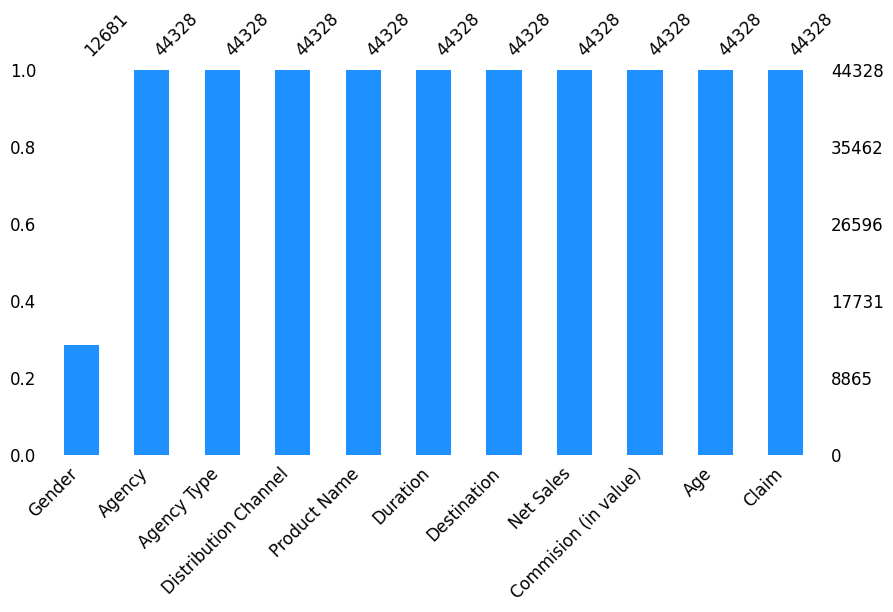

In [9]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

This is also supported by the bar plot which shows that only the Gender column has missing values/missing data.

<Axes: >

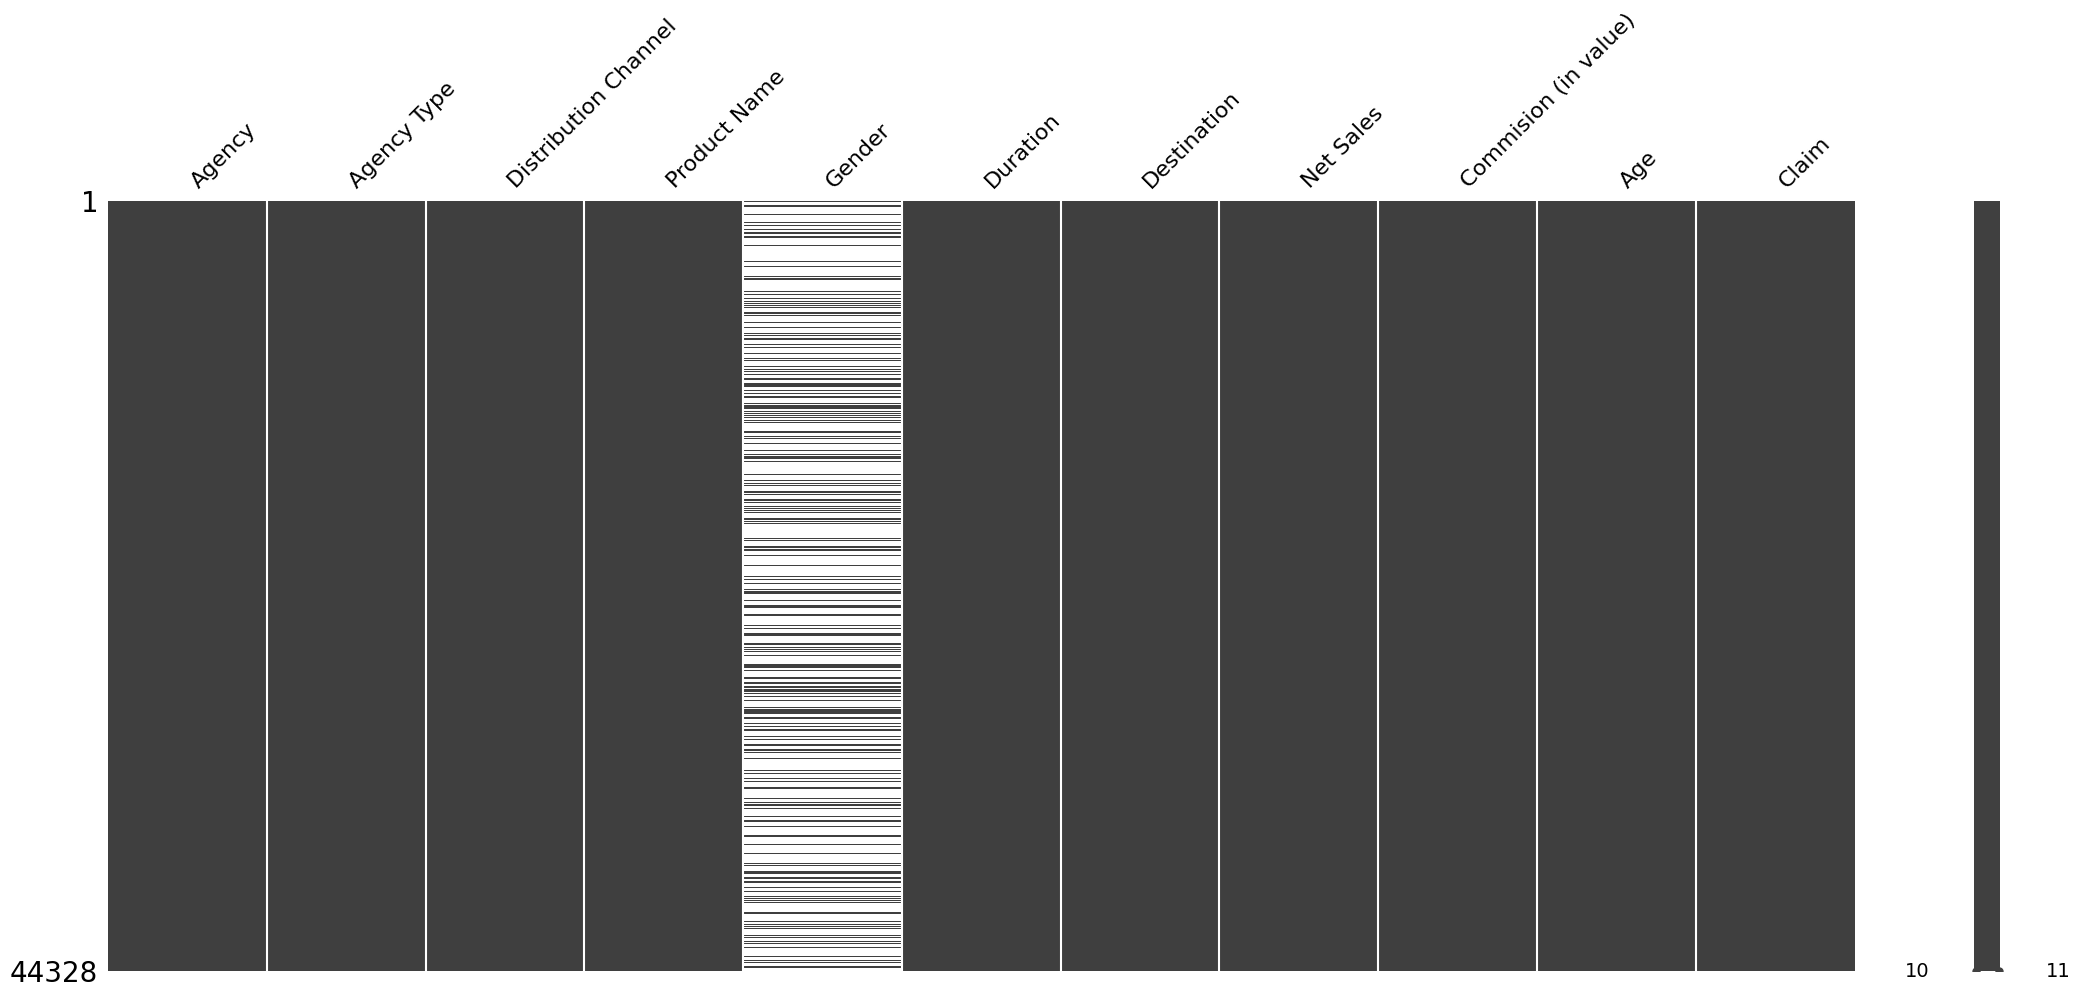

In [10]:
missingno.matrix(df)

- From the matrix it can be seen that the missing data/missing values ​​have a random distribution.
- This makes it even more difficult to perform imputation.

In [11]:
clean_df = df.drop(['Gender'], axis=1)
clean_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


Finally, the deletion of the 'Gender' column was carried out with several considerations:
1. Missing data was only found in the 'Gender' column
2. Missing data in the 'Gender' column was more than 50%
3. Data imputation for the 'Gender' column is at risk of bias because:
   - Gender is a categorical variable that cannot be estimated using simple statistical methods
   - There is no strong correlation with other variables that can be used to estimate gender

**3.2 Duplicated Values**

In [12]:
# Duplicated rows
print("Total duplicated rows: ", clean_df.duplicated().sum())

Total duplicated rows:  5004


In the code above, a check is carried out on the total number of *duplicated values* (missing values) in the dataset

The results show that there are **5004 rows** containing duplicate values ​​in the dataset. The next step is to remove *duplicate values* because in Machine Learning modeling, duplicate data can cause bias in the model and slow down computation

In [13]:
cleaned_df = clean_df.drop_duplicates(keep='first').reset_index(drop=True)
cleaned_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.3 Identify Spelling Errors**

In [14]:
# Data Cleaning - Categoric Variable

categoric_features = cleaned_df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total category on '{col}': {cleaned_df[col].nunique()}")

Total category on 'Agency': 16
Total category on 'Agency Type': 2
Total category on 'Distribution Channel': 2
Total category on 'Product Name': 26
Total category on 'Destination': 138
Total category on 'Claim': 2


From the output, we can see the number of unique categories for each categorical column in the dataset

Interesting Insights

- Destination: 138 unique categories
    Quite a large number, it is very possible that there are errors in the spelling of country names. Needs to be checked more carefully because it involves country names

- Product Name: 26 unique categories
    Represents various travel insurance products offered.
    Need to be checked for possible variations in the spelling of the same product name

- Agency: 16 unique categories
    This number is quite reasonable to represent various travel agencies.
    Need to be checked for possible duplication due to spelling errors

In [15]:
for col in categoric_features.columns:
    print(f"Column: {col}")
    print(cleaned_df[col].value_counts())
    print()

Column: Agency
Agency
EPX    20990
CWT     5726
C2B     5334
JZI     4233
SSI      711
LWC      452
RAB      440
TST      329
JWT      284
KML      229
ART      226
CCR      114
CSR       68
CBH       67
TTW       66
ADM       55
Name: count, dtype: int64

Column: Agency Type
Agency Type
Travel Agency    28096
Airlines         11228
Name: count, dtype: int64

Column: Distribution Channel
Distribution Channel
Online     38613
Offline      711
Name: count, dtype: int64

Column: Product Name
Product Name
Cancellation Plan                       11009
2 way Comprehensive Plan                 8133
Rental Vehicle Excess Insurance          5726
Basic Plan                               3638
Bronze Plan                              2634
1 way Comprehensive Plan                 1848
Value Plan                               1549
Silver Plan                              1480
Annual Silver Plan                        849
Ticket Protector                          711
Travel Cruise Protect            

- After checking the spelling error of each column with the code above, no spelling error was found.
- Both in columns with only two unique categories ('Claim', "Distribution Channel", and 'Agency Type') and those with many categories ('Agency', 'Product Name', and 'Destination')
- But special attention to 'Destination' because there are many unique categories and it concerns the name of the country so further analysis is needed

In [16]:
print("Column: Destination")
print(cleaned_df['Destination'].value_counts())

Column: Destination
Destination
SINGAPORE           8106
THAILAND            3659
MALAYSIA            3173
CHINA               2931
AUSTRALIA           2453
                    ... 
JAMAICA                1
ANGOLA                 1
FRENCH POLYNESIA       1
NIGERIA                1
REUNION                1
Name: count, Length: 138, dtype: int64


- From the code above, it is known that there are countries that have more than one word
- This could be a potential error, such as excessive spaces or spaces that are not in the right place
- Sometimes there are also long country names and there are similarities
- So it is necessary to check which countries have spaces in their country names in the dataset

In [17]:
print("Country with spaces:")
space_countries = cleaned_df[cleaned_df['Destination'].str.contains(' ')]['Destination'].unique()
for country in space_countries:
    print(f"- {country} long words: {len(country.split())})")

Country with spaces:
- UNITED STATES long words: 2)
- KOREA, REPUBLIC OF long words: 3)
- VIET NAM long words: 2)
- UNITED KINGDOM long words: 2)
- SRI LANKA long words: 2)
- HONG KONG long words: 2)
- UNITED ARAB EMIRATES long words: 3)
- IRAN, ISLAMIC REPUBLIC OF long words: 4)
- TAIWAN, PROVINCE OF CHINA long words: 4)
- BRUNEI DARUSSALAM long words: 2)
- CZECH REPUBLIC long words: 2)
- RUSSIAN FEDERATION long words: 2)
- TANZANIA, UNITED REPUBLIC OF long words: 4)
- NEW ZEALAND long words: 2)
- LAO PEOPLE'S DEMOCRATIC REPUBLIC long words: 4)
- SAUDI ARABIA long words: 2)
- CAYMAN ISLANDS long words: 2)
- NORTHERN MARIANA ISLANDS long words: 3)
- SOUTH AFRICA long words: 2)
- COSTA RICA long words: 2)
- PAPUA NEW GUINEA long words: 3)
- FRENCH POLYNESIA long words: 2)
- MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF long words: 6)
- TRINIDAD AND TOBAGO long words: 3)
- REPUBLIC OF MONTENEGRO long words: 3)
- PUERTO RICO long words: 2)
- KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF long words:

- It can be seen in the code that there is a spelling error in the country 'VIET NAM' which should be 'VIETNAM'
- Also found similar country names such as 'KOREA, REPUBLIC OF' and 'KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF' so they need to be changed to become more common names
- The names of countries that are quite complicated are also changed

In [18]:
correction_dict = {
    'VIET NAM': 'VIETNAM',
    'KOREA, REPUBLIC OF': 'SOUTH KOREA',
    'IRAN, ISLAMIC REPUBLIC OF ': 'IRAN',
    'TAIWAN, PROVINCE OF CHINA': 'TAIWAN',
    'RUSSIAN FEDERATION' : 'RUSSIA',
    'TANZANIA, UNITED REPUBLIC OF': 'TANZANIA',
    'LAO PEOPLE\'S DEMOCRATIC REPUBLIC': 'LAOS',
    'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF': 'MACEDONIA',
    'KOREA, DEMOCRATIC PEOPLE\'S REPUBLIC OF': 'NORTH KOREA',
    'MOLDOVA, REPUBLIC OF': 'MOLDOVA',
    # Tambahkan pasangan negara lain yang perlu diperbaiki
}
cleaned_df['Destination'] = cleaned_df['Destination'].replace(correction_dict)

In [19]:
print("Hasil setelah perbaikan:")
print(cleaned_df['Destination'].value_counts())

Hasil setelah perbaikan:
Destination
SINGAPORE           8106
THAILAND            3659
MALAYSIA            3173
CHINA               2931
AUSTRALIA           2453
                    ... 
JAMAICA                1
ANGOLA                 1
FRENCH POLYNESIA       1
NIGERIA                1
REUNION                1
Name: count, Length: 138, dtype: int64


**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)


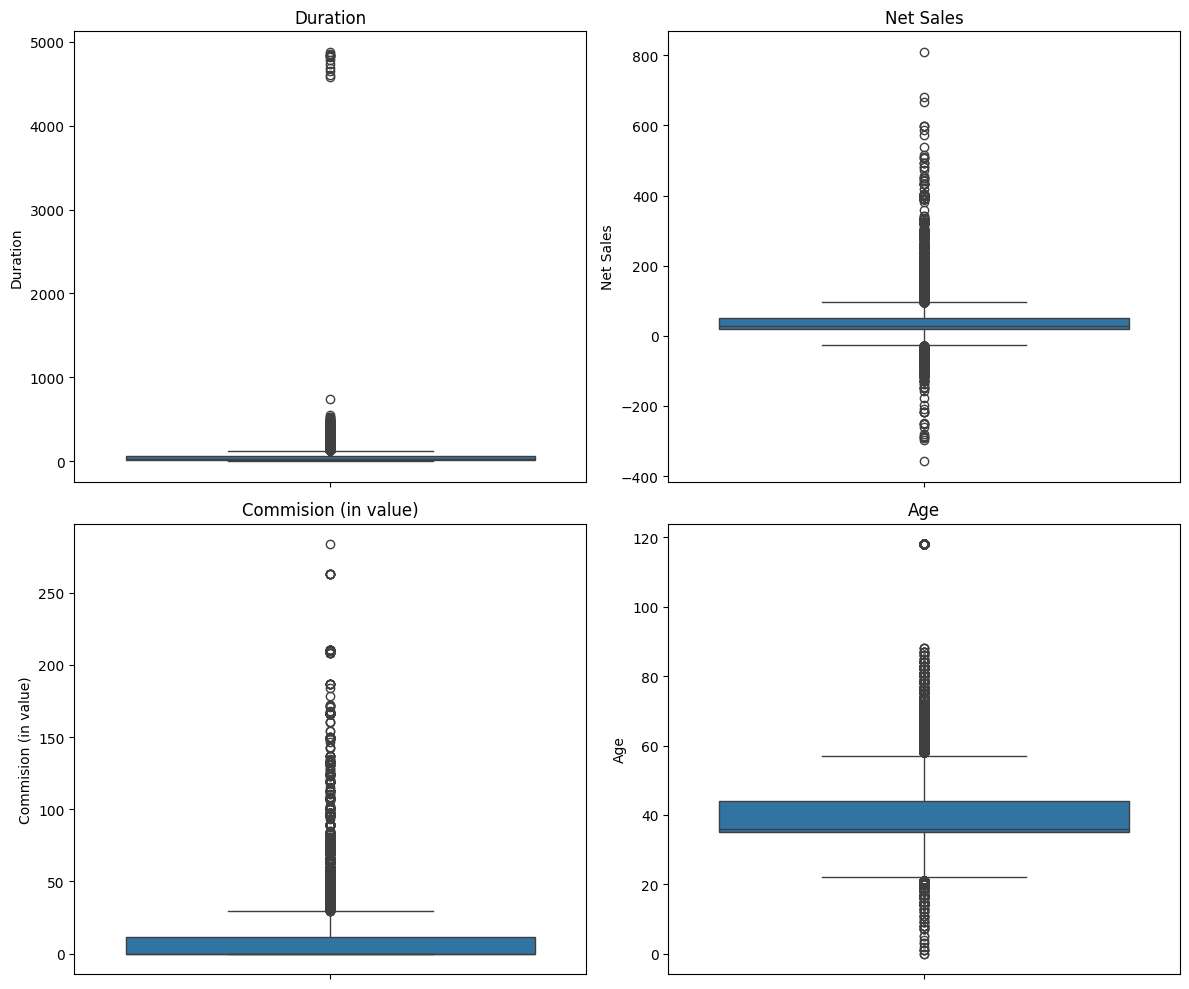

In [20]:
# Identify numeric features
numeric_features = cleaned_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(cleaned_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

1. The majority of durations are concentrated around 0-1000 days. There is a significant outlier around 4500-5000 days (around 12-13 years). This is of particular concern because it indicates an anomaly
2. The customer age range is from 1-120 years where the range focuses below 100 years. There is an outlier at 120 years which indicates an anomaly
3. For Commission and Net Sales data, outliers were also found but no anomaly was indicated

In [21]:
filtered_df = cleaned_df[(cleaned_df['Duration'] <= 4000) & (cleaned_df['Age'] <= 100) & (cleaned_df['Age'] >= 0)]

Filtering is done on the Duration and Age Columns with several considerations:

1. For Duration >4000 days:
   - Visa and Residence Permit Regulations:
   Most countries limit the maximum duration of stay to 180 days for tourist visas. Long-term visas such as work/study visas are usually a maximum of 2-5 years. Reference: Schengen Visa Code (Regulation (EC) No 810/2009) limits the maximum stay to 90 days in a 180-day period

   - Insurance Policy Limits:
   Travel insurance generally limits the duration per trip to between 30-365 days. For annual multi-trip policies, usually a maximum of 90-180 days per trip. Reference: Allianz Global Assistance and World Nomads generally limit the duration per trip to a maximum of 365 days

2. For Age >100 years:
   - Underwriting Risk:
   Insurance companies calculate risk based on mortality statistics. Ages over 100 years have a very high health risk. Reference: The Society of Actuaries (SOA) classifies age >85 years as very high risk

   - Policy Age Limit:
   Most travel insurances have a maximum age limit of 75-85 years. Some companies offer up to 90 years with higher premiums. Reference: AIG Travel Guard and Travelex Insurance have a maximum age limit of 85 years

In [22]:
print(f"Data Before filter: {len(cleaned_df)}")
print(f"Data After filter: {len(filtered_df)}")

Data Before filter: 39324
Data After filter: 38888


With this filtering we lose about 3.9 percent data

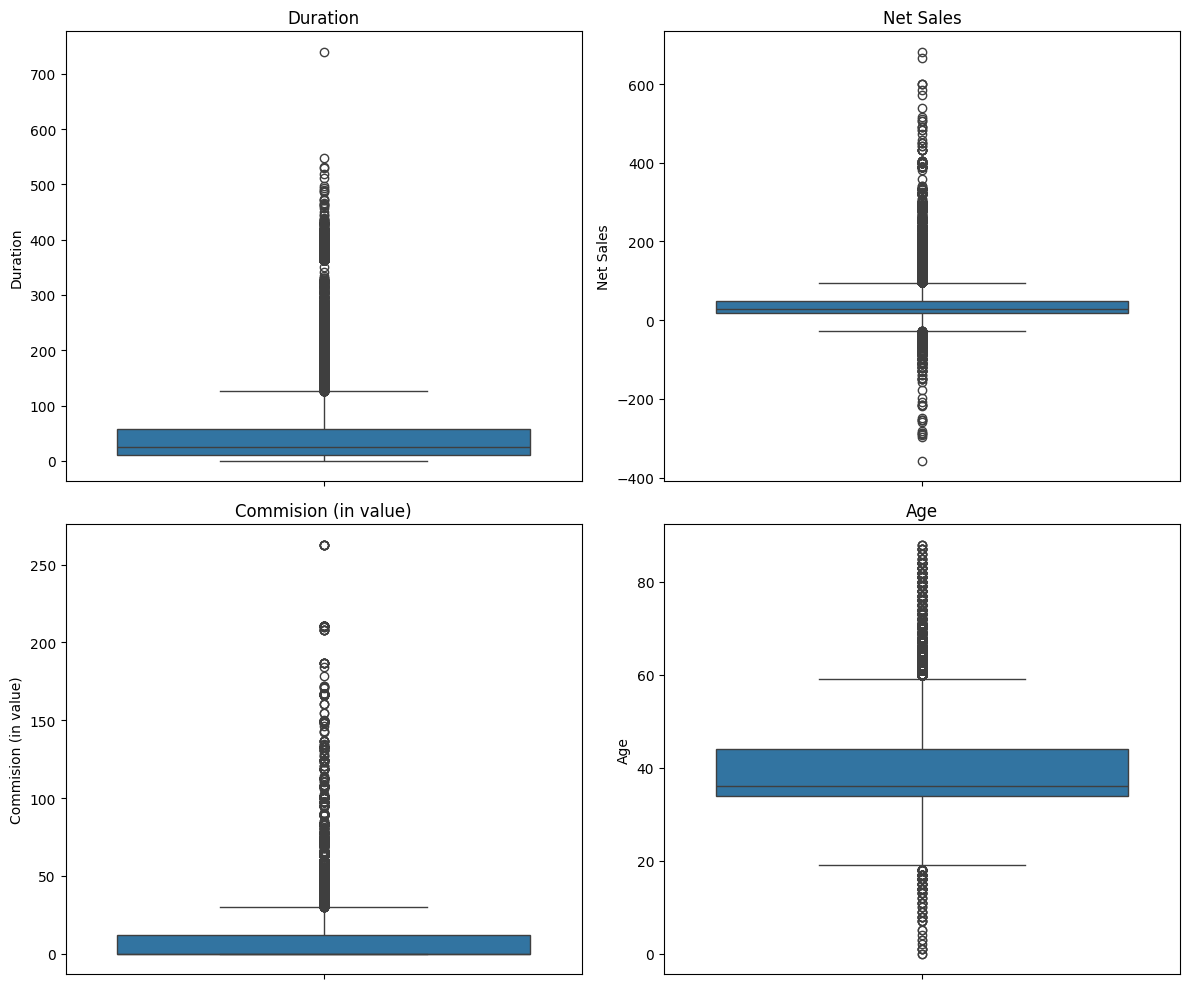

In [23]:
# Identify numeric features
numeric_features = filtered_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(filtered_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

The boxplot above is the result of data filtering, it can be seen that there are still outliers but the current outliers are not that far from the boxplot. For this, several strategies can be done:
1. Binning on Column Age and Duration
2. Scaling on Column Commission and Net Sales

- Check Cardinality (Categorical Variable)

In [24]:
categorical_features = filtered_df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"Total unique values on `{feature}`: {filtered_df[feature].nunique()}")
    print(filtered_df[feature].value_counts(normalize=True))
    print()

Total unique values on `Agency`: 15
Agency
EPX    0.539009
CWT    0.147218
C2B    0.137163
JZI    0.107617
SSI    0.017769
LWC    0.011623
RAB    0.011315
TST    0.008460
KML    0.005889
ART    0.004937
CCR    0.002443
CSR    0.001749
CBH    0.001723
TTW    0.001697
ADM    0.001389
Name: proportion, dtype: float64

Total unique values on `Agency Type`: 2
Agency Type
Travel Agency    0.721199
Airlines         0.278801
Name: proportion, dtype: float64

Total unique values on `Distribution Channel`: 2
Distribution Channel
Online     0.983157
Offline    0.016843
Name: proportion, dtype: float64

Total unique values on `Product Name`: 26
Product Name
Cancellation Plan                       0.283044
2 way Comprehensive Plan                0.208522
Rental Vehicle Excess Insurance         0.147218
Basic Plan                              0.092548
Bronze Plan                             0.067733
1 way Comprehensive Plan                0.047444
Silver Plan                             0.038058
Val

The results obtained from the cardinality check above are:
1. The 'Claim' column, which is defined as the target, is very unbalanced, so a handling strategy is needed.
2. The 'Destination' column has too many unique values ​​so that binning can be done.

In [25]:
filtered_df.to_csv('clean_dataset.csv')

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [26]:
# Define feature and target
feature = filtered_df.drop('Claim', axis=1)
target = filtered_df['Claim']

- feature: Here, we take all the columns from the filtered_df DataFrame except the 'Claim' column. These are the columns that we will use as features for our machine learning model. In other words, these are the input data that will be used to predict the target value.

- target: The 'Claim' column is separated and stored in the target variable. This is the value that we want to predict. So, we will train the model to predict the value of 'Claim' based on the features that we have defined.

In [27]:
# Split data into Seen (80%) and Unseen (20%)
seen_data, unseen_data = train_test_split(filtered_df, test_size=0.2, random_state=42, stratify= target)

- train_test_split: This function divides the filtered_df dataset into two parts:
    1. seen_data: This part will be used to train our model. Usually, around 80% of the original data is used for training.
    2. unseen_data: This part will be used to evaluate the performance of the model after training. This data has never been "seen" by the model during training.
- test_size=0.2: This parameter determines the proportion of data that will be used as test data, which is 20%.
    - The data is divided 80:20 because it adheres to the Pareto system where this concept provides a general overview that a small portion of input often produces a large portion of output.

In [28]:
# Check the shape of each dataset
seen_shape = seen_data.shape
unseen_shape = unseen_data.shape

In [29]:
seen_shape, unseen_shape

((31110, 10), (7778, 10))

In [30]:
unseen_data_df = pd.DataFrame(unseen_data) 

In [31]:
unseen_data_df.to_csv('unseen_dataset.csv')

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

Exploration in Features and Target

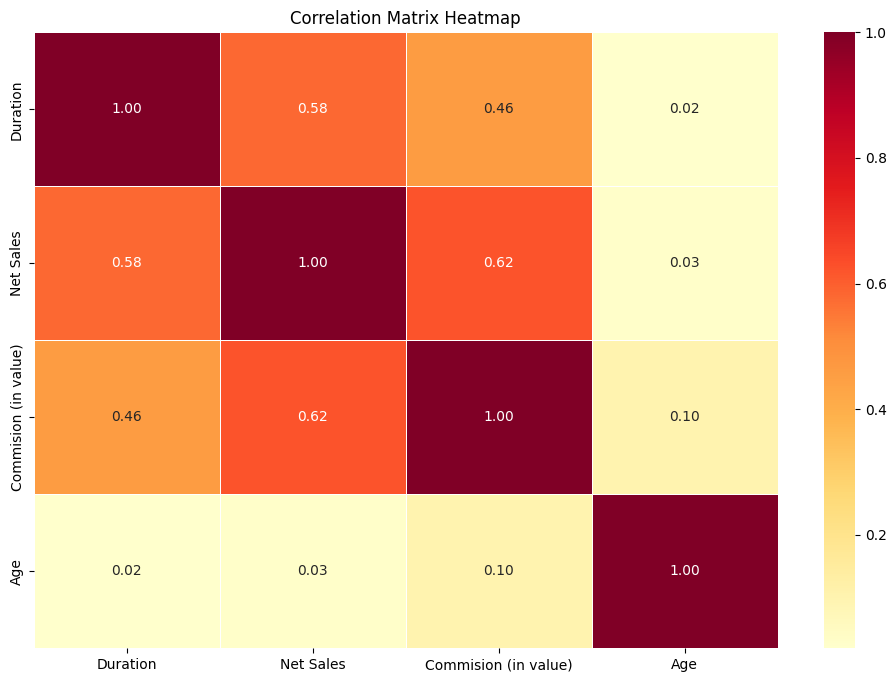

In [32]:
# Select only numeric columns from the data
numeric_data = seen_data.select_dtypes(include=['number'])

# Calculate the correlation matrix on numeric data only
correlation_matrix = numeric_data.corr()

# Create the heatmap with a custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap=sns.color_palette("YlOrRd", as_cmap=True)  # Color palette similar to the image
)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap you provided, here are some insights that can be obtained based on the correlation matrix:

1. High Correlation Between Net Sales and Commission (in value) (0.62):

    This shows a fairly strong positive relationship between net sales and commission in value. This means that the higher the net sales, the higher the commission generated.

2. Moderate Correlation Between Duration and Net Sales (0.58):

    Duration has a moderate correlation with net sales. This shows that the longer the duration (maybe the working time or sales period), the greater the likelihood of net sales increasing.

3. Low Correlation with Age:

    The Age variable shows a very low correlation with all other variables, with a correlation value close to zero. This means that age does not have a significant effect on duration, net sales, or commission.

4. Weak Positive Correlation Between Duration and Commission (in value) (0.46):

    Although not as strong as the relationship with Net Sales, duration still has a weak positive relationship with commission. This means that longer durations contribute slightly to increased commissions.

5. Relationship between Age and Other Variables:

    The Age variable has a very small correlation value (0.02 to 0.10). This indicates that age is not a determining factor in this model.

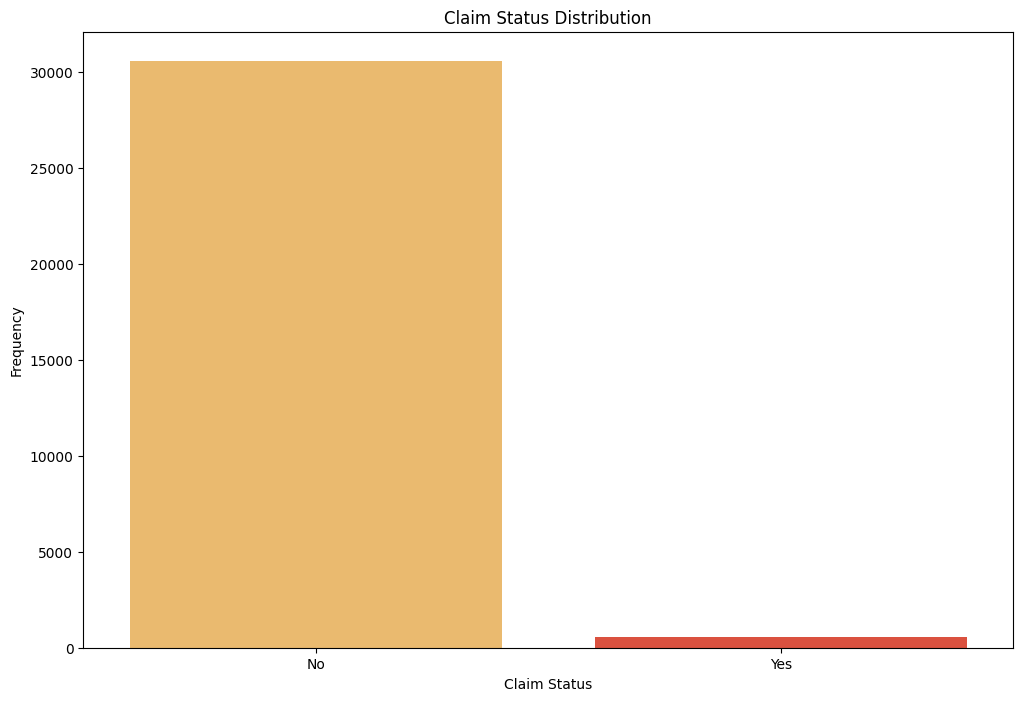

Claim
No     30577
Yes      533
Name: count, dtype: int64

In [33]:
# Calculate the distribution of values in the 'Claim' column
claim_distribution = seen_data['Claim'].value_counts()

# Create a visualization of the distribution
plt.figure(figsize=(12, 8))
sns.countplot(
    x='Claim',
    data=seen_data,
    hue='Claim', 
    palette=sns.color_palette("YlOrRd", n_colors=len(seen_data['Claim'].unique()))
)
plt.title('Claim Status Distribution')
plt.xlabel('Claim Status')
plt.ylabel('Frequency')
plt.show()

# Display the distribution of claims in a table format
claim_distribution


1. Shows significant imbalanced data:

   - Claim "No": 30,577 (98.29%)
   - Claim "Yes": 533 (1.71%)

2. Implications for the model:

   - Special techniques are needed to handle imbalanced data
   - Models can be biased towards the majority class (No Claim)
   - Standard evaluation metrics such as accuracy may not be relevant

**5.2 Analysis 2**

Exploration in feature 'Destination'

In [34]:
# Group data by "Destination"
df1 = seen_data.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15, ['counts'])
df1['DestinationNew'] = np.where(df1['counts'] > 1250, df1['Destination'], 'Others')

# Define custom gradient palette (red to yellow)
custom_colors = px.colors.sequential.YlOrRd[::-1] 

# Create the pie chart with the new palette
fig = px.pie(df1, 
             values='counts', 
             names='DestinationNew', 
             title='Destinations Popularity',
             color_discrete_sequence=custom_colors)  # Apply gradient colors

# Update layout for better visualization
fig.update_traces(textposition='inside', 
                  textinfo='percent+label')
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    )
)

fig.show()

- It can be seen that in the pie chart, Asian countries are frequently visited by insurance customers. 
- It can also be seen that 38.2% are 'Others' because the other countries are quite rarely visited by customers.

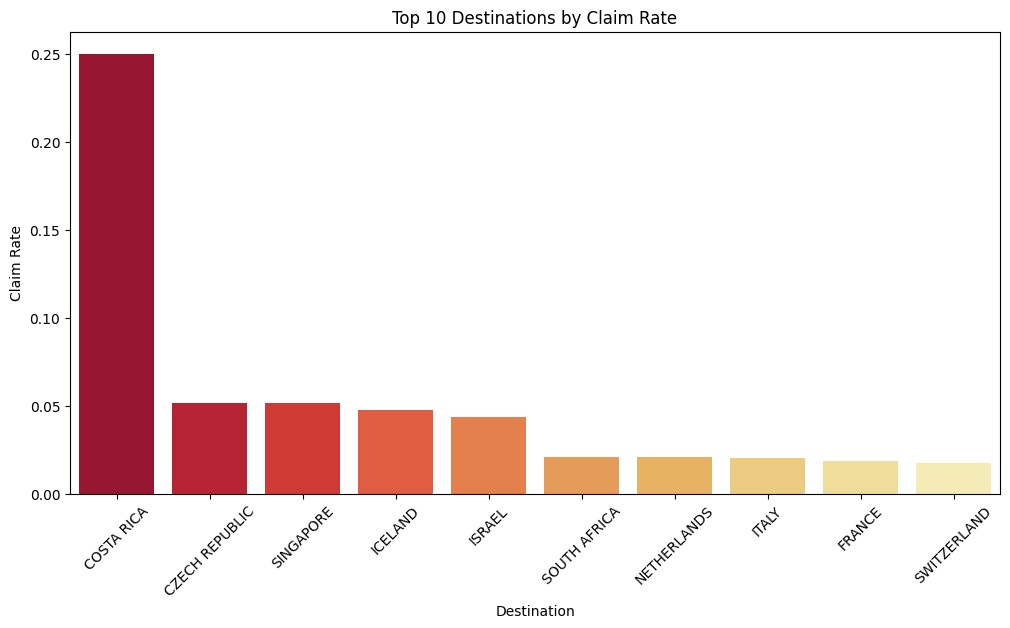

In [35]:
# Convert 'Claim' to a binary column for easier analysis
seen_data['Claim_Binary'] = seen_data['Claim'].apply(lambda x: 1 if x == 'Yes' else 0)

# Destination vs. Claim Rate
claim_rate_by_destination = seen_data.groupby('Destination')['Claim_Binary'].mean().sort_values(ascending=False).head(10)

# Plot Claim Rate by Destination
plt.figure(figsize=(12, 6))
sns.barplot(x=claim_rate_by_destination.index, y=claim_rate_by_destination.values, palette="YlOrRd_r")
plt.xticks(rotation=45)
plt.title("Top 10 Destinations by Claim Rate")
plt.ylabel("Claim Rate")
plt.xlabel("Destination")
plt.show()

- Costa Rica has a much higher Claim Rate compared to other destinations, approaching 0.25.
- Destinations such as the Czech Republic, Singapore, Iceland, and Israel have similar Claim Rates, around 0.05, but much lower than Costa Rica.
- Destinations such as Italy, France, and Switzerland are in the very low Claim Rate range, approaching no

**5.3 Analysis 3**

Exploration in feature 'Age' and 'Duration'

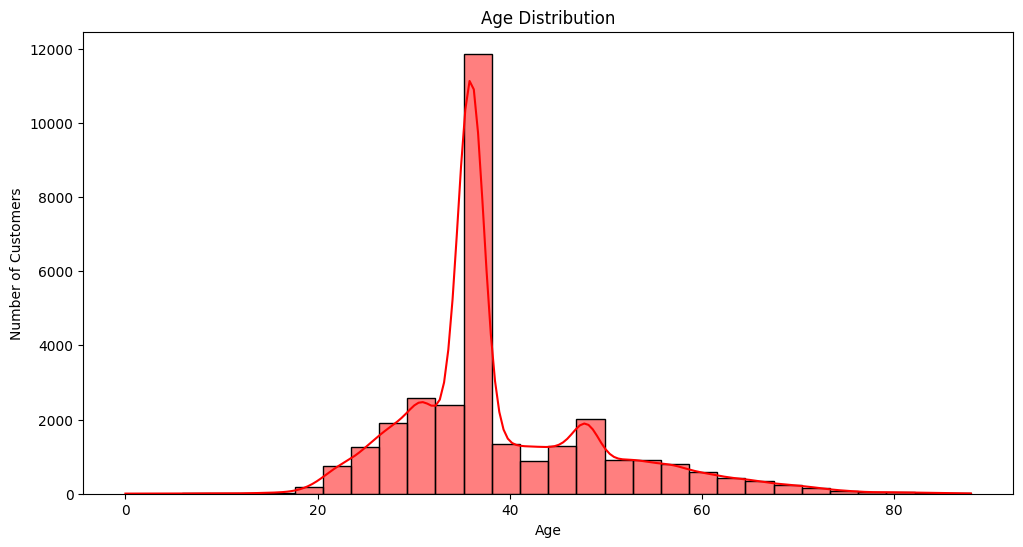

In [36]:
# Age Distribution
claimants_age = seen_data['Age']

# Plot Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(claimants_age, bins=30, kde=True, color='red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

- For age data, it appears to be fairly normally distributed, with values ​​clustered below 40
- However, it can be seen that there are outliers, although they are not too uneven and do not indicate anomalies
- It is necessary to group age data to overcome the outlier problem.

In [37]:
def cat_age(age):
    if age <= 17:
        return "Kid"
    elif 18 <= age <= 30:
        return "Young"
    elif 31 <= age <= 50:
        return "Mature"
    elif 51 <= age <= 65:
        return "Senior"
    elif age > 65:
        return "Old"
    else:
        return None
seen_data['category_age'] = seen_data['Age'].apply(cat_age)
unseen_data['category_age'] = unseen_data['Age'].apply(cat_age)

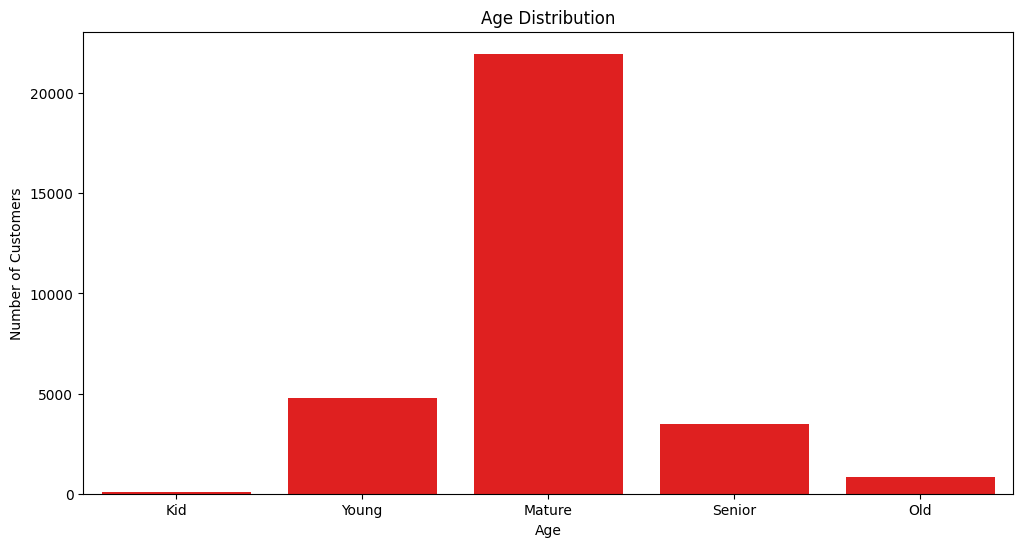

In [38]:
# Age Distribution 
claimants_age = seen_data['category_age']
age_order = ["Kid", "Young","Mature", "Senior", "Old"]

# Plot Age Distribution as Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=seen_data, x='category_age', color='red', order = age_order )
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

- After being grouped, the data is indeed gathered in 'Mature' because in the histogram the data is also gathered in that range.
- However, the data looks quite normal after being changed

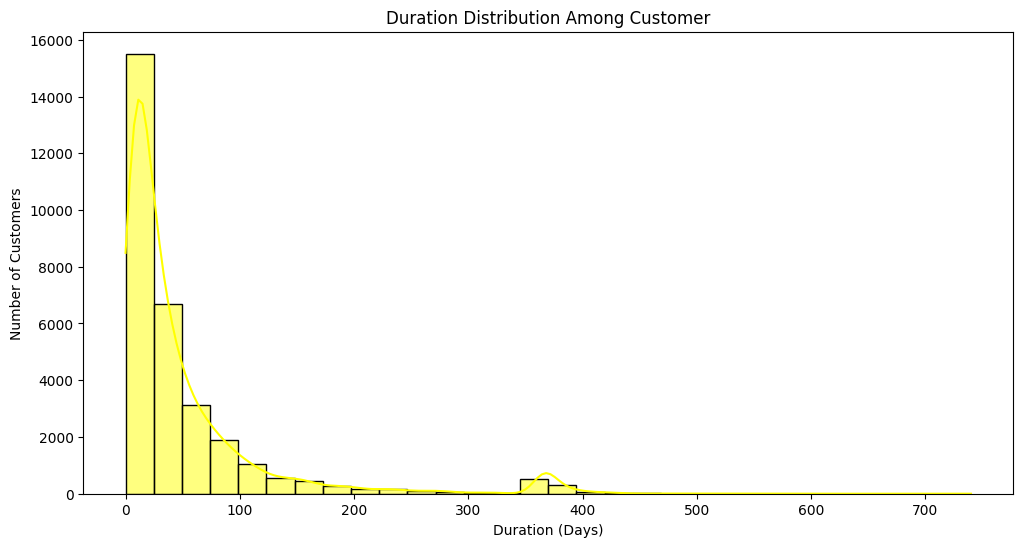

In [39]:
# Age Distribution Among Customer
claimants_duration = seen_data['Duration']

# Plot Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(claimants_duration, bins=30, kde=True, color='yellow')
plt.title("Duration Distribution Among Customer")
plt.xlabel("Duration (Days)")
plt.ylabel("Number of Customers")
plt.show()

- For age data, it does not appear to be normally distributed because it continues to decrease if the duration value is higher
- Most data is gathered at values ​​in the range of 0 to 100
- There are also outliers in the histogram but no anomalous values ​​are indicated
- To overcome the outlier problem, grouping/binning is also carried out

In [40]:
def cat_duration(dur):
    if dur < 7:
        return "< 1 week"
    elif 7 <= dur <= 14:
        return "1-2 weeks"
    elif 15 <= dur <= 21:
        return "2-3 weeks"
    elif 22 <= dur <= 28:
        return "3-4 weeks"
    elif 29 <= dur <= 60:
        return "1-2 months"
    elif 61 <= dur <= 90:
        return "2-3 months"
    elif  dur > 90:
        return ">3 months"
    else:
        return None
seen_data['category_duration'] = seen_data['Duration'].apply(cat_duration)
unseen_data['category_duration'] = unseen_data['Duration'].apply(cat_duration)

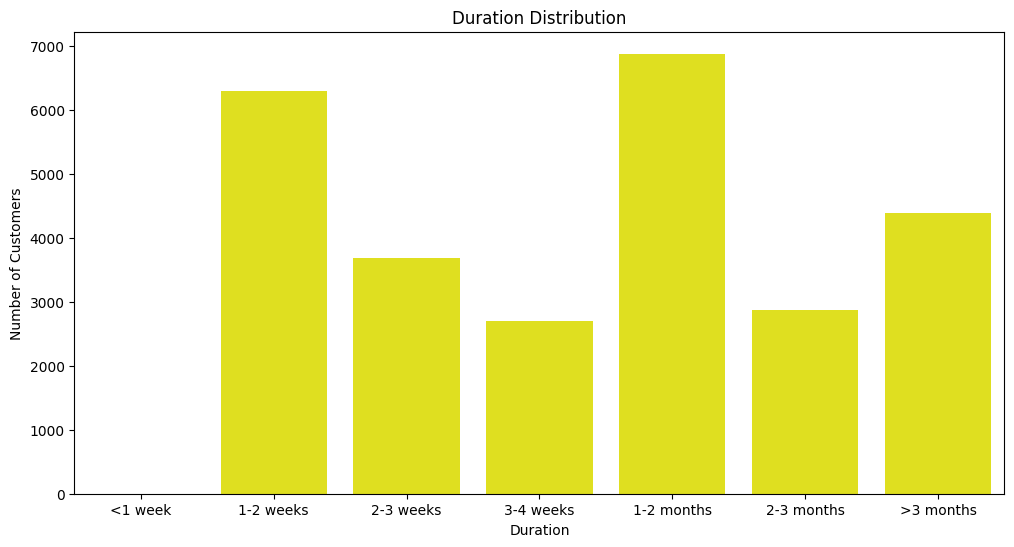

In [41]:
# Age Distribution Among Claimants
claimants_dur = seen_data['category_duration']
dur_order = ['<1 week', '1-2 weeks', '2-3 weeks', '3-4 weeks', '1-2 months', '2-3 months', '>3 months']

# Plot Age Distribution as Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=seen_data, x='category_duration', color='yellow', order = dur_order )
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Number of Customers")
plt.show()

- 1-2 Month Duration Dominates: The highest number of customers is in the 1-2 month duration group
- Data shows that it is not evenly distributed across all duration groups.

**5.4 Analysis 4**

Exploration in feature 'Agency' and 'Commission'

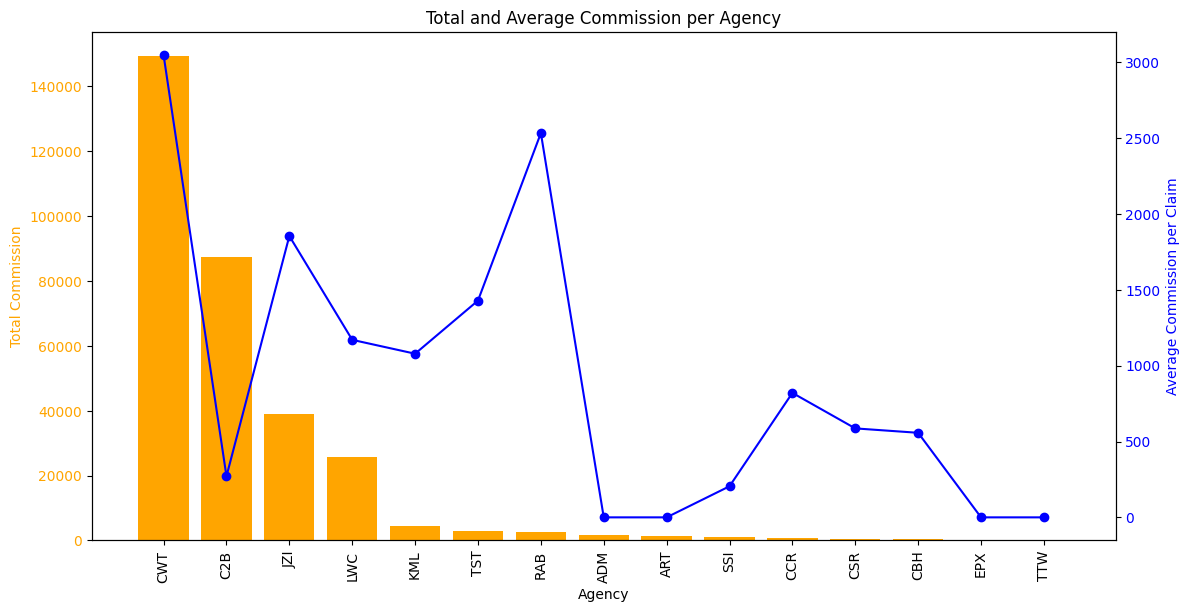

,Agency,Total Sales,Total Claims,Total Commission,Average Commission
6,CWT,196673.40,49,149295.96,3046.856327
2,C2B,333163.13,323,87486.85,270.857121
8,JZI,107414.00,21,38939.95,1854.283333
10,LWC,38901.90,22,25742.80,1170.127273
9,KML,11094.00,4,4314.52,1078.630000


In [42]:
# Group by Agency and summarize key metrics
agency_performance = seen_data.groupby('Agency').agg({
    'Net Sales': 'sum',
    'Claim': lambda x: (x == 'Yes').sum(),
    'Commision (in value)': 'sum'
}).reset_index()

# Rename columns for clarity
agency_performance.rename(columns={'Claim': 'Total Claims', 
                                   'Net Sales': 'Total Sales', 
                                   'Commision (in value)': 'Total Commission'}, inplace=True)

# Sort by Total Claims for better visualization
agency_performance = agency_performance.sort_values(by='Total Claims', ascending=False)

# Calculate average commission per agency
agency_performance['Average Commission'] = agency_performance['Total Commission'] / agency_performance['Total Claims']
agency_performance.replace([float('inf'), float('-inf')], 0, inplace=True)  # Replace division errors with 0

# Sort by Total Commission for visualization
agency_commission = agency_performance.sort_values(by='Total Commission', ascending=False)

# Plot Total Commission and Average Commission per Agency
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Commission
ax1.bar(agency_commission['Agency'], agency_commission['Total Commission'], color='orange', label='Total Commission')
ax1.set_xlabel('Agency')
ax1.set_ylabel('Total Commission', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
plt.xticks(rotation=90)

# Overlay Average Commission on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(agency_commission['Agency'], agency_commission['Average Commission'], color='blue', marker='o', label='Average Commission')
ax2.set_ylabel('Average Commission per Claim', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Total and Average Commission per Agency')
plt.show()

# Display the agencies with the highest total commission
agency_commission.head(5)


- CWT Agency has the highest total commission, more than 140,000, which far exceeds other agencies. This shows that CWT has a very high volume or claim value compared to other agencies.
- Average Commission per Claim is very high for certain agencies such as CWT and RAB, but very low or close to zero for agencies such as EPX and TWW.
- Many agencies such as KML, TST, ADM, and ART have very small total commissions, even close to zero. However, some of them may have quite high average commissions.

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function


In [43]:
# Load the dataset
df_ml = seen_data

# Display initial rows
df_ml.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Claim_Binary,category_age,category_duration
192,C2B,Airlines,Online,Silver Plan,21,SINGAPORE,62.25,15.56,34,No,0,Mature,2-3 weeks
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,CANADA,89.10,53.46,36,No,0,Mature,1-2 weeks
15943,C2B,Airlines,Online,Annual Gold Plan,417,SINGAPORE,321.75,80.44,43,No,0,Mature,>3 months
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,20,AUSTRALIA,89.10,53.46,28,No,0,Young,2-3 weeks
9088,SSI,Airlines,Online,Ticket Protector,112,SINGAPORE,10.75,3.02,48,No,0,Mature,>3 months


In [44]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31110 entries, 192 to 19935
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                31110 non-null  object 
 1   Agency Type           31110 non-null  object 
 2   Distribution Channel  31110 non-null  object 
 3   Product Name          31110 non-null  object 
 4   Duration              31110 non-null  int64  
 5   Destination           31110 non-null  object 
 6   Net Sales             31110 non-null  float64
 7   Commision (in value)  31110 non-null  float64
 8   Age                   31110 non-null  int64  
 9   Claim                 31110 non-null  object 
 10  Claim_Binary          31110 non-null  int64  
 11  category_age          31110 non-null  object 
 12  category_duration     31110 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.3+ MB
None


By adjsuting the data during EDA phases, we can determine wheter numerical and categorical columns should undergo binning, scaling, and encoding. Here's what we will do:

1. Perform Binning on Destination columns, where 0 indicate Asia, 1 indicate Afica, 2 indicate Europe, 3 indicate North America, 4 indicate South America, and 5 Oceania. This is done because there is too much uniqe value in destination
2. Perform Binning on Age Columns, where 0 indicate Kid (0-17), 1 indicate Young (18-30), 2 indicate Mature (31-50), 3 indicate Senior (51-60), and 4 indicate Old (60+). This is done because the data in Age Columns is not normal and usually age data is binning/grouping
3. Perform Binning on Duration Columns, where 0 indicate < 1 week, 1 indicate 1-2 weeks, 2 indicate 2-3 weeks, 3 indicate 3-4 weeks, 4 indicate 1-2 months, 5 indicate 2-3 months, 6 indicate >3 months. This is done because the data in Duration Columns is not normal
4. Perform Scaling on 'Net Sales' and 'Commision (in value)' this is because distribution is not normal and It is a bit difficult to binning because there is no specific category for both data. In this notebook we used RobustScaler and PowerTransformer
5. Perform One Hot Encoding on Agency Type and Distribution Channel because both data only contain 2 unique values
6. Perform Binary Encodingon Agency and Product Name because both data contain more than two uniqe values

In [45]:
# Manual mapping of countries to continents based on the provided list
manual_continent_mapping_full = {
    "Asia": [
        "ARMENIA", "AZERBAIJAN", "BAHRAIN", "BANGLADESH", "BRUNEI DARUSSALAM", "CAMBODIA", "CHINA",
        "GEORGIA", "HONG KONG", "INDIA", "INDONESIA", "IRAN, ISLAMIC REPUBLIC OF", "ISRAEL", "JAPAN",
        "JORDAN", "KAZAKHSTAN", "SOUTH KOREA", "KUWAIT", "KYRGYZSTAN", "LAOS",
        "LEBANON", "MALAYSIA", "MALDIVES", "MONGOLIA", "MYANMAR", "NEPAL", "OMAN", "PAKISTAN",
        "PHILIPPINES", "QATAR", "SAUDI ARABIA", "SINGAPORE", "SRI LANKA", "TAIWAN",
        "TAJIKISTAN", "THAILAND", "TURKMENISTAN", "UNITED ARAB EMIRATES", "UZBEKISTAN", "VIETNAM", "MACAO", "BHUTAN", "NORTH KOREA"
    ],
    "Africa": [
        "ANGOLA", "BENIN", "BOTSWANA", "CAMEROON", "EGYPT", "ETHIOPIA", "GHANA", "GUINEA",
        "GUINEA-BISSAU", "KENYA", "MALI", "MOROCCO", "NAMIBIA", "NIGERIA", "RWANDA", "SENEGAL",
        "SOUTH AFRICA", "TANZANIA", "TUNISIA", "UGANDA", "ZAMBIA", "ZIMBABWE","MAURITIUS","TRINIDAD AND TOBAGO"
    ],
    "Europe": [
        "AUSTRIA", "BELARUS", "BELGIUM", "BULGARIA", "CROATIA", "CYPRUS", "CZECH REPUBLIC", "DENMARK",
        "ESTONIA", "FINLAND", "FRANCE", "GERMANY", "GREECE", "HUNGARY", "ICELAND", "IRELAND",
        "ITALY", "LATVIA", "LITHUANIA", "LUXEMBOURG", "MACEDONIA",
        "MOLDOVA", "NETHERLANDS", "NORWAY", "POLAND", "PORTUGAL", "ROMANIA",
        "RUSSIA", "SERBIA", "SLOVENIA", "SPAIN", "SWEDEN", "SWITZERLAND", "UKRAINE",
        "UNITED KINGDOM", "TURKEY", "MALTA", "REPUBLIC OF MONTENEGRO"
    ],
    "North America": [
        "BERMUDA", "CANADA", "CAYMAN ISLANDS", "COSTA RICA", "DOMINICAN REPUBLIC", "GUAM",
        "MEXICO", "NORTHERN MARIANA ISLANDS", "PUERTO RICO", "UNITED STATES", "GUADELOUPE", "JAMAICA"
    ],
    "South America": [
        "ARGENTINA", "BOLIVIA", "BRAZIL", "CHILE", "COLOMBIA", "ECUADOR", "GUYANA", "PARAGUAY",
        "PERU", "SURINAME", "URUGUAY", "VENEZUELA", "PANAMA"
    ],
    "Oceania": [
        "AUSTRALIA", "FIJI", "FRENCH POLYNESIA", "NEW ZEALAND", "PAPUA NEW GUINEA", "SAMOA", "VANUATU"
    ]
}

# Update the reverse mapping for all countries
country_to_continent_full = {country: continent for continent, countries in manual_continent_mapping_full.items() for country in countries}

# Apply the updated mapping to the 'Destination' column
df_ml['Continent'] = df_ml['Destination'].apply(lambda x: country_to_continent_full.get(x, "Unknown"))

# Group destinations by continent and display the results
grouped_by_continent_final = df_ml.groupby('Continent')['Destination'].unique()

grouped_by_continent_final


Continent
Africa           [SOUTH AFRICA, GHANA, BENIN, ZIMBABWE, MOROCCO...
Asia             [SINGAPORE, JAPAN, INDIA, HONG KONG, VIETNAM, ...
Europe           [FRANCE, UNITED KINGDOM, ITALY, AUSTRIA, NORWA...
North America    [CANADA, UNITED STATES, COSTA RICA, MEXICO, PU...
Oceania          [AUSTRALIA, NEW ZEALAND, PAPUA NEW GUINEA, SAM...
South America    [BRAZIL, PERU, ECUADOR, COLOMBIA, CHILE, BOLIV...
Name: Destination, dtype: object

In [46]:
df_ml['category_age'] = df_ml['category_age'].apply(lambda x: '<17' if x == 'Kid' else ('18-30' if x == 'Young' else ('31-50' if x == 'Mature' else ('51-60' if x == 'Senior' else '60+'))))
df_ml['Continent'] = df_ml['Destination'].apply(lambda x: country_to_continent_full.get(x, "Unknown"))
df_ml['category_duration'] = df_ml['category_duration'].apply(lambda x: '<1 week' if x == '< 1 week' else ('1-2 weeks' if x == '1-2 weeks' else ('2-3 weeks' if x == '2-3 weeks' else ('3-4 weeks' if x == '3-4 weeks' else ('1-2 months' if x == '1-2 months' else ('2-3 months' if x == '2-3 months' else '>3 months'))))))


In [47]:
# Map categorical features to numeric
df_ml['category_age'] = df_ml['category_age'].map({
    'Kid': 0, '<17': 0,
    'Young': 1, '18-30': 1,
    'Mature': 2, '31-50': 2,
    'Senior': 3, '51-60': 3,
    '60+': 4
})

df_ml['category_duration'] = df_ml['category_duration'].map({
    '< 1 week': 0, '<1 week': 0,
    '1-2 weeks': 1,
    '2-3 weeks': 2,
    '3-4 weeks': 3,
    '1-2 months': 4,
    '2-3 months': 5,
    '>3 months': 6
})

df_ml['Continent'] = df_ml['Continent'].map({
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'North America': 3,
    'Oceania': 4,
    'South America': 5
})

In [48]:
df_ml['Continent'].unique()

array([1, 3, 4, 2, 5, 0], dtype=int64)

In [49]:
df_ml = df_ml.drop(['Claim_Binary', 'Age', 'Duration', 'Destination'], axis=1)

In [50]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31110 entries, 192 to 19935
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                31110 non-null  object 
 1   Agency Type           31110 non-null  object 
 2   Distribution Channel  31110 non-null  object 
 3   Product Name          31110 non-null  object 
 4   Net Sales             31110 non-null  float64
 5   Commision (in value)  31110 non-null  float64
 6   Claim                 31110 non-null  object 
 7   category_age          31110 non-null  int64  
 8   category_duration     31110 non-null  int64  
 9   Continent             31110 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.6+ MB
None


In [51]:
# Display initial rows
df_ml

,Agency,Agency Type,Distribution Channel,Product Name,Net Sales,Commision (in value),Claim,category_age,category_duration,Continent
192,C2B,Airlines,Online,Silver Plan,62.25,15.56,No,2,2,1
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,89.10,53.46,No,2,1,3
15943,C2B,Airlines,Online,Annual Gold Plan,321.75,80.44,No,2,6,1
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,89.10,53.46,No,1,2,4
9088,SSI,Airlines,Online,Ticket Protector,10.75,3.02,No,2,6,1
...,...,...,...,...,...,...,...,...,...,...
22896,EPX,Travel Agency,Online,Cancellation Plan,26.00,0.00,No,2,4,1
17318,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,69.30,41.58,No,1,3,2
3551,EPX,Travel Agency,Online,2 way Comprehensive Plan,68.00,0.00,No,2,6,2
37211,C2B,Airlines,Online,Silver Plan,66.00,16.50,No,2,4,1


- Define Feature and Target

In [52]:
# Define feature and target
feature = df_ml.drop('Claim', axis=1)
target = df_ml['Claim']

In [53]:
# Change Claim value to numerical
target = target.map(dict(Yes=1, No=0))

In [54]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42, stratify=target)
print(X_train.shape)
print(y_train.shape)

(21777, 9)
(21777,)


train_test_split: This function splits the dataset into two parts:

1. Training set (X_train, y_train): This part is used to train the model. Typically, around 70% of the original data is used for training.

2. Testing set (X_test, y_test): This part is used to evaluate the performance of the model after the training process. This data is never used when the model is trained.

test_size=0.3: This parameter determines the proportion of data to be used as testing data, which is 30%.

- The data is split in a 70:30 ratio because this is a common split that provides a balance between data for training the model and data for evaluating the model.
- With this ratio, there is enough data available for training, while the 30% testing data provides a representative evaluation of the model's performance on new data that has never been seen before.

In [55]:
y_train.value_counts()

Claim
0    21404
1      373
Name: count, dtype: int64

**6.2 Data Transformation (Feature Engineering)**

In [56]:
# Create transformer object (FeatureEngineering)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include='object').columns

In [57]:
# Change Claim value to numerical
df_ml.Claim = df_ml.Claim.map(dict(Yes=1, No=0))

In [58]:
numeric_features

Index(['Net Sales', 'Commision (in value)', 'category_age',
       'category_duration', 'Continent'],
      dtype='object')

In [59]:
categorical_features

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name'], dtype='object')

In [60]:
# One hot encoding for 'Agency Type' and 'Distribution Channel'
one_hot_var = ['Agency Type', 'Distribution Channel']

# Binary encoding for 'Agency' and 'Product Name'
binary_var = ['Agency', 'Product Name']

# Target encoding for 'Destination'
target_var = ['Destination']

# Define ColumnTransformer with robust scaling and encoders
transformer = ColumnTransformer([
    ('scaling_robust', RobustScaler(), ['Net Sales', 'Commision (in value)']),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_var),
    ('binary', BinaryEncoder(), binary_var),
], remainder='passthrough')

# Alternative transformer using PowerTransformer
transformer_2 = ColumnTransformer([
    ('power_transform', PowerTransformer(), ['Net Sales', 'Commision (in value)']),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_var),
    ('binary', BinaryEncoder(), binary_var),
], remainder='passthrough')

In [61]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_robust', RobustScaler(),
                                 ['Net Sales', 'Commision (in value)']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name'])])

In [62]:
X_train_pre = transformer.transform(X_train)
X_test_pre = transformer.transform(X_test)

In [63]:
# Fit the transformer and transform the dataset
X_train_transformed = pd.DataFrame(X_train_pre)
X_train_transformed.columns = transformer.get_feature_names_out()
X_train_transformed

,scaling_robust__Net Sales,scaling_robust__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,0.672131,2.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,-0.360656,0.530303,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2,1.016393,1.262626,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.081967,1.450337,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
4,-0.229508,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,2.944262,6.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0
21773,-0.124590,0.530303,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
21774,0.655738,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,4.0
21775,0.196721,1.031145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0


In [64]:
# Fit the transformer and transform the dataset
X_test_transformed = pd.DataFrame(X_test_pre)
X_test_transformed.columns = transformer.get_feature_names_out()
X_test_transformed

,scaling_robust__Net Sales,scaling_robust__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,-0.626230,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0
1,0.022951,1.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2,-0.459016,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,5.0,1.0
3,-0.098361,0.765993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0
4,2.721311,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,-0.327869,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
9329,-0.491803,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
9330,0.032787,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
9331,0.032787,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0


In [65]:
transformer.get_feature_names_out()

array(['scaling_robust__Net Sales',
       'scaling_robust__Commision (in value)',
       'one_hot__Agency Type_Travel Agency',
       'one_hot__Distribution Channel_Online', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'remainder__category_age',
       'remainder__category_duration', 'remainder__Continent'],
      dtype=object)

In [66]:
transformer_2.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('power_transform', PowerTransformer(),
                                 ['Net Sales', 'Commision (in value)']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name'])])

In [67]:
X_train_pre_2 = transformer_2.transform(X_train)
X_test_pre_2 = transformer_2.transform(X_test)

In [68]:
# Fit the transformer and transform the dataset
X_train_transformed_2 = pd.DataFrame(X_train_pre_2)
X_train_transformed_2.columns = transformer_2.get_feature_names_out()
X_train_transformed_2

,power_transform__Net Sales,power_transform__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,0.189641,1.356509,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,-0.456839,0.742322,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2,0.396919,1.118164,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.277430,1.170646,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
4,-0.371783,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,1.517278,1.593168,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0
21773,-0.304557,0.742322,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
21774,0.179694,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,4.0
21775,-0.102264,1.037637,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0


In [69]:
# Fit the transformer and transform the dataset
X_test_transformed_2 = pd.DataFrame(X_test_pre_2)
X_test_transformed_2.columns = transformer_2.get_feature_names_out()
X_test_transformed_2

,power_transform__Net Sales,power_transform__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,-0.633750,0.714106,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0
1,-0.211059,1.183073,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2,-0.521521,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,5.0,1.0
3,-0.287851,0.911285,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0
4,1.390370,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,-0.435457,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
9329,-0.543280,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
9330,-0.204865,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
9331,-0.204865,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0


In [70]:
transformer_2.get_feature_names_out()

array(['power_transform__Net Sales',
       'power_transform__Commision (in value)',
       'one_hot__Agency Type_Travel Agency',
       'one_hot__Distribution Channel_Online', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'remainder__category_age',
       'remainder__category_duration', 'remainder__Continent'],
      dtype=object)

**6.3 Overview**

In [71]:
print("Data Preparation Overview:")
print(f"Number of features: {X_train_pre.shape[1]}")
print(f"Train size: {len(X_train_pre)}, Test size: {len(X_test_pre)}")

Data Preparation Overview:
Number of features: 16
Train size: 21777, Test size: 9333


## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function

In [72]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [73]:
logit = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb = XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight)
lgb = LGBMClassifier(random_state=42,scale_pos_weight=scale_pos_weight)
logit_pen = LogisticRegression(random_state=42, class_weight='balanced')
svm = SVC(class_weight='balanced', random_state=42)
ada = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
brf = BalancedRandomForestClassifier(random_state=42)
eec = EasyEnsembleClassifier(random_state=42)
rus = RUSBoostClassifier(random_state=42)

list_models = [rf, xgb, logit, knn, dt,lgb, logit_pen, svm, ada, gbc, brf, eec, rus]

The selection of the above models to handle imbalanced data is based on different approaches to address class imbalance. Here are the reasons for each model:

1. LogisticRegression
   - logit: A basic logistic regression model to see the performance baseline.
   - logit_pen: Using the class_weight='balanced' parameter, gives more weight to the minority class to reduce the influence of data imbalance.
2. KNeighborsClassifier (knn)
As a baseline model to compare performance with other approaches.
1. DecisionTreeClassifier (dt)
Decision trees can overfit the majority class. This model is useful as a simple baseline and to understand hierarchical data separation.
1. RandomForestClassifier (rf)
The class_weight='balanced' parameter ensures that the minority class is given more weight when forming the tree, helping to handle imbalanced data.
1. XGBClassifier (xgb)
scale_pos_weight is a parameter that explicitly handles class imbalance by giving more weight to the minority class.
1. LGBMClassifier (lgb)
Like XGBoost, LightGBM supports the scale_pos_weight parameter to handle class imbalance during training.
1. Support Vector Classifier (svm)
The class_weight='balanced' parameter gives more weight to the minority class during the classification process.
1. AdaBoostClassifier (ada)
Adaboost can help improve model performance by giving more weight to the minority class prediction error in the boosting iteration.
1. GradientBoostingClassifier (gbc)
Similar to Adaboost, but uses a gradient-based boosting approach. Suitable as a comparison to other boosting algorithms.
1. BalancedRandomForestClassifier (brf)
A version of Random Forest specifically designed for imbalanced data. Uses majority class subsampling when training each tree to ensure balance.
1. EasyEnsembleClassifier (eec)
An ensemble model that uses repeated undersampling of the majority class, making it suitable for highly imbalanced data.
1. RUSBoostClassifier (rus)
A combination of Random Under Sampling (RUS) and boosting. Effective for imbalanced data because it explicitly balances classes.

- Create a workflow of the experiment

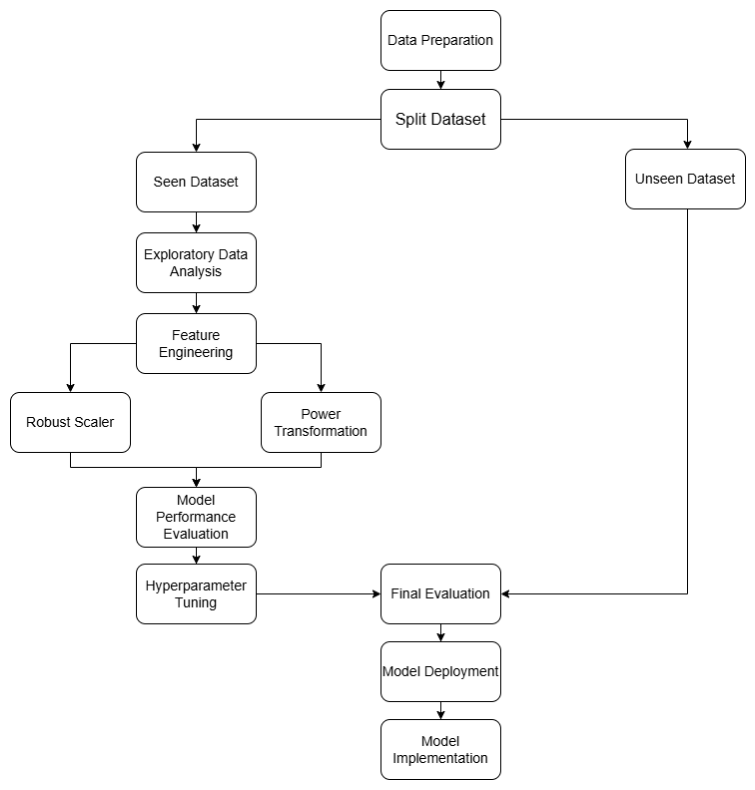

In [74]:
# Load and display an image
plt.figure(figsize=(20, 10))
img = mpimg.imread(r"D:\Purwadhika\Module 3. Machine Learning\Capstone\travel_insurance\assets\Experiment_Workflow.png")
plt.imshow(img)
plt.axis('off')  
plt.show()

**7.2 Developing the Model Pipeline**

In [75]:

robust_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Resampling', None),
    ('Classifier', None)
])

pt_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer_2),
    ('Resampling', None),
    ('Classifier', None)
])

**7.3 Model Benchmarking (Comparing model base performance)**

Here are the reasons behind choosing each resampling method:
1. SMOTE : If the minority class does not have enough variation, SMOTE can enrich the data with more meaningful samples
2. RandomOverSampler : Useful for comparing performance with more complex methods
3. ADASYN : Useful for datasets where minority data is not evenly distributed or has many complex areas
4. NearMiss : To evaluate the performance of undersampling methods on a dataset. Can produce more efficient models on very large datasets

In [76]:
benchmark_robust = GridSearchCV(
    estimator=robust_bal_clf,
    param_grid={'Resampling' :[SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              ADASYN(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_models},
    scoring = 'roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

In [77]:
# benchmark process
benchmark_robust.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
                                        AdaBoostClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42),
                                        BalancedRandomForestClassifier(random_state=42),
                                        EasyEnsembleClassifier(random_state=42),
                                        RUSBoostClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        ADASYN(random_state=42), NearMiss()]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [78]:
pd.DataFrame(benchmark_robust.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.571331,0.039732,0.034017,0.005077,"LogisticRegression(class_weight='balanced', ra...",RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.819908,0.853855,0.750021,0.803547,0.775006,0.800467,0.035863,1,0.815540,0.796675,0.826782,0.810274,0.818202,0.813494,0.009962
9,0.720440,0.039419,0.041318,0.005669,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.819908,0.853855,0.750021,0.803547,0.775006,0.800467,0.035863,1,0.815540,0.796675,0.826782,0.810274,0.818202,0.813494,0.009962
24,0.593912,0.011202,0.038191,0.010493,"LogisticRegression(class_weight='balanced', ra...",SMOTE(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.821263,0.838021,0.747369,0.798282,0.768265,0.794640,0.033269,3,0.814001,0.791574,0.822855,0.807643,0.815511,0.810317,0.010547
8,0.714403,0.021486,0.039432,0.005646,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.821263,0.838021,0.747369,0.798282,0.768265,0.794640,0.033269,3,0.814001,0.791574,0.822855,0.807643,0.815511,0.810317,0.010547
10,0.865968,0.115325,0.046238,0.008201,LogisticRegression(random_state=42),ADASYN(random_state=42),{'Classifier': LogisticRegression(random_state...,0.819011,0.836096,0.747909,0.799444,0.770626,0.794617,0.031925,5,0.813804,0.791217,0.822970,0.807290,0.815728,0.810202,0.010728
26,0.647931,0.022463,0.031736,0.001607,"LogisticRegression(class_weight='balanced', ra...",ADASYN(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.818335,0.836189,0.748660,0.799763,0.770065,0.794603,0.031724,6,0.813938,0.791175,0.822774,0.807489,0.815683,0.810212,0.010691
37,9.322130,0.651363,0.137721,0.068583,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': GradientBoostingClassifier(rand...,0.798899,0.854933,0.739553,0.814832,0.758919,0.793427,0.040901,7,0.879029,0.867904,0.887009,0.871273,0.880866,0.877216,0.006849
49,3.596224,0.043056,0.121122,0.006279,RUSBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': RUSBoostClassifier(random_state...,0.813447,0.832693,0.753217,0.813499,0.749952,0.792561,0.034202,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
33,2.834263,0.030293,0.135608,0.006616,AdaBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': AdaBoostClassifier(random_state...,0.813447,0.832693,0.753217,0.813499,0.749952,0.792561,0.034202,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
46,29.280748,0.837420,0.819058,0.343449,EasyEnsembleClassifier(random_state=42),ADASYN(random_state=42),{'Classifier': EasyEnsembleClassifier(random_s...,0.799363,0.826143,0.751078,0.802427,0.783721,0.792546,0.024780,10,0.800579,0.789190,0.816376,0.799325,0.823595,0.805813,0.012439


In [79]:
benchmark_robust.best_score_

0.8004674607438224

In [80]:
benchmark_pt = GridSearchCV(
    estimator= pt_bal_clf,
    param_grid={'Resampling' :[SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              ADASYN(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_models},
    scoring = 'roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

In [81]:
# benchmark process
benchmark_pt.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
                                        AdaBoostClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42),
                                        BalancedRandomForestClassifier(random_state=42),
                                        EasyEnsembleClassifier(random_state=42),
                                        RUSBoostClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        ADASYN(random_state=42), NearMiss()]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [82]:
pd.DataFrame(benchmark_pt.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.639106,0.029057,0.034791,0.002317,"LogisticRegression(class_weight='balanced', ra...",RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.816862,0.853073,0.746712,0.803955,0.776925,0.799506,0.036021,1,0.816057,0.797111,0.828807,0.810271,0.825045,0.815458,0.011260
9,0.760681,0.040004,0.044960,0.003950,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.816862,0.853073,0.746712,0.803955,0.776925,0.799506,0.036021,1,0.816057,0.797111,0.828807,0.810271,0.825045,0.815458,0.011260
24,0.671726,0.063913,0.035045,0.002556,"LogisticRegression(class_weight='balanced', ra...",SMOTE(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.817420,0.834240,0.744452,0.800063,0.774685,0.794172,0.031725,3,0.814684,0.790746,0.823641,0.807323,0.821731,0.811625,0.011919
8,0.734226,0.083426,0.049864,0.007065,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.817420,0.834240,0.744452,0.800063,0.774685,0.794172,0.031725,3,0.814684,0.790746,0.823641,0.807323,0.821731,0.811625,0.011919
26,0.659530,0.038147,0.033827,0.002520,"LogisticRegression(class_weight='balanced', ra...",ADASYN(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.816261,0.836498,0.741943,0.799191,0.774031,0.793585,0.032974,5,0.814393,0.792256,0.824556,0.807337,0.822367,0.812182,0.011681
10,0.823351,0.016543,0.038209,0.003139,LogisticRegression(random_state=42),ADASYN(random_state=42),{'Classifier': LogisticRegression(random_state...,0.816105,0.836498,0.741311,0.799210,0.774464,0.793518,0.033101,6,0.814356,0.792270,0.824406,0.807269,0.822498,0.812160,0.011672
37,9.360797,0.891063,0.061381,0.005097,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': GradientBoostingClassifier(rand...,0.798943,0.854933,0.739684,0.814832,0.758919,0.793462,0.040867,7,0.879029,0.867904,0.887009,0.871273,0.880866,0.877216,0.006849
49,3.823842,0.059951,0.124973,0.004699,RUSBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': RUSBoostClassifier(random_state...,0.813475,0.832721,0.753450,0.813499,0.749952,0.792619,0.034158,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
33,2.918124,0.508406,0.107390,0.004477,AdaBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': AdaBoostClassifier(random_state...,0.813475,0.832721,0.753450,0.813499,0.749952,0.792619,0.034158,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
45,23.520781,0.435153,0.698158,0.063661,EasyEnsembleClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': EasyEnsembleClassifier(random_s...,0.799091,0.830331,0.742391,0.815659,0.764763,0.790447,0.032466,10,0.809272,0.795391,0.810854,0.795998,0.825583,0.807420,0.011138


In [83]:
benchmark_pt.best_score_

0.7995055203911414

In [84]:
# Save model

best_model_robust = benchmark_robust.best_estimator_
best_model_pt = benchmark_pt.best_estimator_

pickle.dump(best_model_robust, open('rblogitros-v1-0801.sav', 'wb'))  # Robust Transformation Logistic Regression  dengan RandomOverSampling
pickle.dump(best_model_pt, open('ptlogitros-v1-0799.sav', 'wb')) # Power Transformation Logistic Regression dengan RandomOverSampling

Model with robust scaler has a better performance score (0.801) compared to the model with power transformer (0.799).

The performance difference between the model using RobustScaler (0.801) and the one using PowerTransformer (0.799) can be explained by the characteristics of the scalers and how they interact with the dataset and the model's behavior.

The score difference (0.002) is minimal, suggesting that both scalers are suitable for the data, but RobustScaler has a slight edge, likely due to its resilience to outliers.


**7.4 Tune Model**

In [85]:
model1 = pickle.load(open('rblogitros-v1-0801.sav', 'rb'))
model2 = pickle.load(open('ptlogitros-v1-0799.sav', 'rb'))

Since both models are logistic regression, a basic combination of tuning is performed
1. Classifier__C (Regularization Strength): Inverse regularization strength regularization parameter. The smaller the C value, the stronger the regularization. Too small a C value can lead to underfitting, while too large a value leads to overfitting. A wide range of values ​​allows exploration of the trade-off between bias and variance.
2. Classifier__penalty (Regularization Type):
   - 'l1': Encourages sparsity (some coefficients become zero).
   - 'l2': Ridge penalty, reduces the size of the coefficients without making them zero.
   - 'elasticnet': Combination of L1 and L2, provides more flexibility.
3. Classifier__solver (Optimization Algorithm):
   - 'lbfgs': Suitable for small to medium datasets.
   - 'liblinear': Efficient for high-dimensional data.
   - 'sag', 'saga': Good for large datasets.
   - 'newton-cholesky': New and optimized for large datasets with enough memory.
4. Classifier__max_iter (Maximum Iterations) : Maximum number of iterations for solver convergence. If the solver does not converge, model performance suffers. Trying different values ​​ensures the model gets enough iterations to reach the optimal solution.
5. Classifier__multi_class (Multi-class Handling) : How to handle multi-class classification problems
   - 'auto': Automatically selects a strategy based on the solver.
   - 'ovr': One vs Rest.
   - 'multinomial': Optimizes all classes simultaneously.
6. Classifier__class_weight : 'balanced': Automatically calculates weights based on class distribution. Very important for imbalanced data, where minority classes can be ignored without proper weighting.

In [86]:
# Model 1
# Improve logistic regression model
#  Define parameter grid
param_space = {
    # Parameter regularisasi
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'Classifier__penalty': ['l1', 'l2', 'elasticnet'],  
    'Classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'Classifier__max_iter': [100, 200, 300, 500],  
    'Classifier__multi_class': ['auto', 'ovr', 'multinomial'],  
    'Classifier__class_weight': ['balanced'],   
}

tunning_logreg = GridSearchCV(
    estimator=model1, 
    param_grid=param_space,
    scoring='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [87]:
tunning_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 200, 300, 500],
                         'Classifier__multi_class': ['auto', 'ovr',
                                                     'multinomial'],
                         'Classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'Classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [88]:
print(tunning_logreg.best_params_)
print(tunning_logreg.best_score_)

{'Classifier__C': 100, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 100, 'Classifier__multi_class': 'auto', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
0.8005588124063128


In [89]:
# Model Improvement 2
# Improve Logistic Regression model: 2

param_space_refined = {
    'Classifier__C': [100, 125, 150, 200, 500],
    'Classifier__penalty': ['l2'],
    'Classifier__solver': ['lbfgs'],
    'Classifier__max_iter': [100, 125, 150, 200, 500],
    'Classifier__multi_class': ['auto'],
    'Classifier__class_weight': ['balanced']
}


tunning_logreg_refined = GridSearchCV(
    estimator=model1,
    param_grid=param_space_refined,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [90]:
tunning_logreg_refined.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
                                        RandomOverSampler(random_state=42)),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [100, 125, 150, 200, 500],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 125, 150, 200, 500],
                         'Classifier__multi_class': ['auto'],
                         'Classifier__penalty': ['l2'],
                         'Classifier__solver': ['lbfgs']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [91]:
# Print parameter and score
print("Best Estimator:", tunning_logreg_refined.best_params_)
print("Best ROC-AUC Score:", tunning_logreg_refined.best_score_)

Best Estimator: {'Classifier__C': 100, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 125, 'Classifier__multi_class': 'auto', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
Best ROC-AUC Score: 0.8008715347573864


In [92]:
# Save model
pickle.dump(tunning_logreg_refined.best_estimator_, open("rblogitros-v2-0800.sav", "wb"))

In [93]:
# Model 2
# Improve logistic regression model
#  Define parameter grid
param_space = {
    # Parameter regularisasi
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'Classifier__penalty': ['l1', 'l2', 'elasticnet'],  
    'Classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'Classifier__max_iter': [100, 200, 300, 500],  
    'Classifier__multi_class': ['auto', 'ovr', 'multinomial'],  
    'Classifier__class_weight': ['balanced'],   
}

tunning_logreg_2 = GridSearchCV(
    estimator=model2, 
    param_grid=param_space,
    scoring='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [94]:
tunning_logreg_2.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 200, 300, 500],
                         'Classifier__multi_class': ['auto', 'ovr',
                                                     'multinomial'],
                         'Classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'Classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [95]:
# Print parameter and score
print("Best Estimator:", tunning_logreg_2.best_params_)
print("Best ROC-AUC Score:", tunning_logreg_2.best_score_)

Best Estimator: {'Classifier__C': 0.01, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 100, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
Best ROC-AUC Score: 0.800305711476135


In [96]:
param_space_refined_2 = {
    # Focus around C=0.01 with finer granularity
    'Classifier__C': [0.005, 0.007, 0.01, 0.013, 0.015],
    'Classifier__penalty': ['l2'],
    'Classifier__solver': ['lbfgs'],
    'Classifier__max_iter': [50, 75, 80, 90, 100],
    'Classifier__multi_class': ['multinomial'],
    'Classifier__class_weight': ['balanced'],
}


# Create new GridSearchCV with refined parameters
tunning_logreg_refined_2 = GridSearchCV(
    estimator=model2,
    param_grid=param_space_refined_2,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)



In [97]:
# Fit the model
tunning_logreg_refined_2.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
                                        RandomOverSampler(random_state=42)),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [0.005, 0.007, 0.01, 0.013, 0.015],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [50, 75, 80, 90, 100],
                         'Classifier__multi_class': ['multinomial'],
                         'Classifier__penalty': ['l2'],
                         'Classifier__solver': ['lbfgs']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [98]:
# Get best parameters and score
print("Best parameters:", tunning_logreg_refined_2.best_params_)
print("Best score:", tunning_logreg_refined_2.best_score_)

Best parameters: {'Classifier__C': 0.015, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 50, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
Best score: 0.8003825725482507


In [99]:
# Save model
pickle.dump(tunning_logreg_refined_2.best_estimator_, open("ptlogitros-v2-0800.sav", "wb"))

In [100]:
# Update best model
best_model = pickle.load(open('rblogitros-v2-0800.sav', 'rb'))

**7.5 Analyze Model**

- Evaluate model on data testing

In [101]:
# Classification Report Before Tuning
y_test_score = benchmark_robust.best_estimator_.predict(X_test)
y_test_score_prob = benchmark_robust.best_estimator_.predict_proba(X_test)
y_train_score_prob = benchmark_robust.best_estimator_.predict_proba(X_train)

print("Model Logistic Regression(Before Tunning) - on Testing")
print(classification_report(y_test, y_test_score))
print()
print("ROC-AUC Score (Training): ", roc_auc_score(y_train, y_train_score_prob[:,1]))
print("ROC-AUC Score (Test): ", roc_auc_score(y_test, y_test_score_prob[:,1]))

Model Logistic Regression(Before Tunning) - on Testing
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      9173
           1       0.05      0.72      0.10       160

    accuracy                           0.78      9333
   macro avg       0.52      0.75      0.49      9333
weighted avg       0.98      0.78      0.86      9333


ROC-AUC Score (Training):  0.8167837637023072
ROC-AUC Score (Test):  0.8095480622479014


In [102]:
# Classification Report After Tuning

y_test_score = tunning_logreg_refined.best_estimator_.predict(X_test)
y_test_score_prob = tunning_logreg_refined.best_estimator_.predict_proba(X_test)
y_train_score_prob = tunning_logreg_refined.best_estimator_.predict_proba(X_train)

print("Model Logistic Regression (After Tunning) - on Testing")
print(classification_report(y_test, y_test_score))
print()
print("ROC-AUC Score (Training): ", roc_auc_score(y_train, y_train_score_prob[:,1]))
print("ROC-AUC Score (Test): ", roc_auc_score(y_test, y_test_score_prob[:,1]))

Model Logistic Regression (After Tunning) - on Testing
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      9173
           1       0.05      0.72      0.10       160

    accuracy                           0.78      9333
   macro avg       0.52      0.75      0.49      9333
weighted avg       0.98      0.78      0.86      9333


ROC-AUC Score (Training):  0.8168036793002534
ROC-AUC Score (Test):  0.809140616483157


The tuning process has not significantly improved the model's performance metrics, as evidenced by similar precision, recall, F1-score, accuracy, and ROC-AUC scores before and after tuning. However, the high recall for the minority class (class 1) indicates that the model can detect most positive cases, although the very low precision reflects a high false positive rate. So for the next process we will use model before tunning

- Residual Analysis

In [103]:
# Update best model
best_model = benchmark_robust.best_estimator_

In [104]:
y_score_prob = best_model.predict_proba(X_test)
y_score_prob = y_score_prob[:, 1]

y_score = best_model.predict(X_test)

In [105]:
y_score_prob

array([0.38014182, 0.48052899, 0.12938465, ..., 0.30122162, 0.15401971,
       0.33356759])

In [106]:
y_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- Learning Curve Inspection

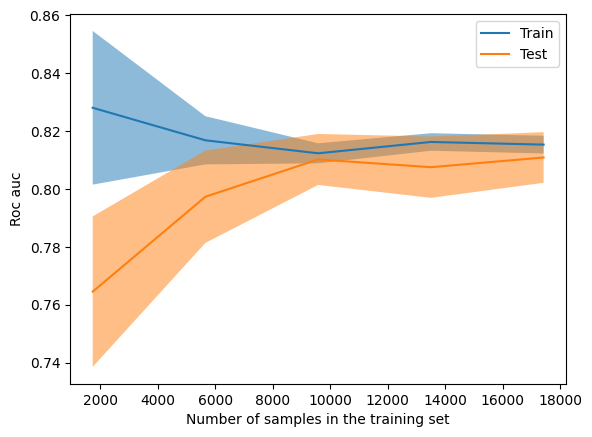

In [107]:
LearningCurveDisplay.from_estimator(best_model, X_train, y_train, scoring='roc_auc')

This graph shows a model's ROC-AUC performance across different training set sizes. Key observations:

- Performance converges around 0.82 ROC-AUC for both train and test sets
- Clear overfitting with small datasets (<6000 samples) - train performance higher than test
- Sweet spot appears around 10,000 samples where test performance catches up to train
- After 10,000 samples, minimal gains in performance despite adding more data

**7.6 Model Calibration (Classification Only)**

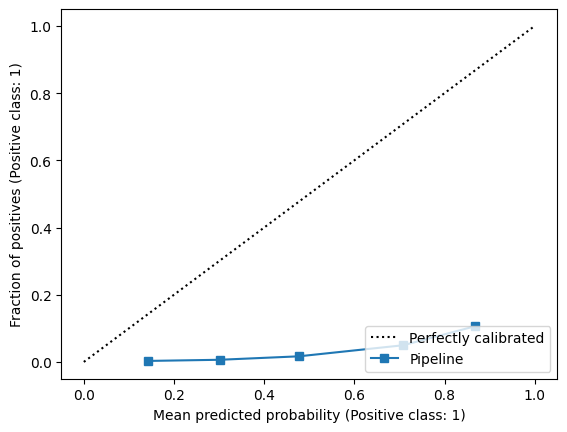

In [108]:
CalibrationDisplay.from_estimator(best_model, X_train, y_train)

This is a calibration plot comparing predicted probabilities vs actual outcomes. The dotted diagonal line shows perfect calibration. The blue line (actual model) shows significant underconfidence - the model predicts probabilities much lower than actual positive rates. For example, when predicting 0.8 probability, only about 0.1 of cases are actually positive, indicating poor probability calibration that needs correction. So for next step is to calibrated the classifier

In [109]:
best_model = CalibratedClassifierCV(best_model, method='isotonic')

In [110]:
best_model.fit(X_train, y_train)

CalibratedClassifierCV(estimator=Pipeline(steps=[('FeatureEngineering',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('scaling_robust',
                                                                                   RobustScaler(),
                                                                                   ['Net '
                                                                                    'Sales',
                                                                                    'Commision '
                                                                                    '(in '
                                                                                    'value)']),
                                                                                  ('one_hot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['Agency '
                                                                                    'Type',
                                                                                    'Distribution '
                                                                                    'Channel']),
                                                                                  ('binary',
                                                                                   BinaryEncoder(),
                                                                                   ['Agency',
                                                                                    'Product '
                                                                                    'Name'])])),
                                                 ('Resampling',
                                                  RandomOverSampler(random_state=42)),
                                                 ('Classifier',
                                                  LogisticRegression(random_state=42))]),
                       method='isotonic')

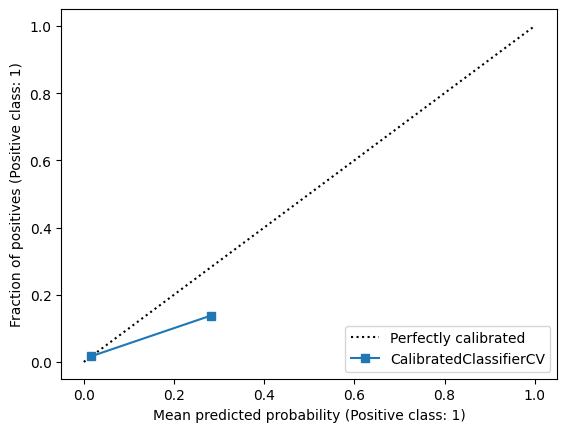

In [111]:
# Classifier after calibration
CalibrationDisplay.from_estimator(best_model, X_train, y_train)

The calibration improved significantly after applying CalibratedClassifierCV with isotonic method. The blue line is now closer to the diagonal dotted line (perfect calibration), especially for lower probabilities (0-0.3 range). However, the model still needs work as it only predicts probabilities up to ~0.3 rather than utilizing the full 0-1 range.

Confusion Matrix:
[[7141 2032]
 [  44  116]]


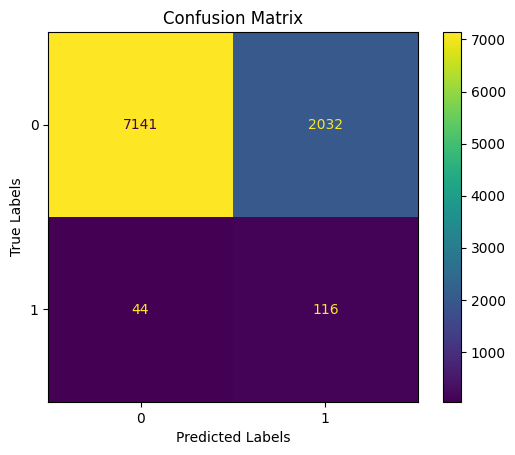

In [112]:
# Make confusion matrix
cm = confusion_matrix(y_test, y_score)

# Showing confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualitation confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='viridis')  
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

**7.6 Model Explanation and Interpretation**
- Feature Importance Coefficient Regression (Regression Based Model)

In [113]:
model = best_model.estimator.named_steps['Classifier']
preprocessing = best_model.estimator.named_steps['FeatureEngineering']

In [114]:
feature_names = preprocessing.get_feature_names_out()

In [115]:
coefficients = model.coef_[0] 

In [116]:
top_10_indices = np.argsort(np.abs(coefficients))[-10:][::-1]
top_10_values = coefficients[top_10_indices]

In [117]:
print("Top 10 Index Biggest Coefficient:", top_10_indices)
print("Top 10 Biggest Value Coefficient:", top_10_values)

Top 10 Index Biggest Coefficient: [ 4  6  8  2  3  5  7  9 11 12]
Top 10 Biggest Value Coefficient: [-2.71400469  2.35163116  2.21456111  2.02381215 -1.08723323 -0.92602016
  0.92002687  0.91600996  0.81256619  0.65484384]


In [118]:
top_10_feature_names = [feature_names[i] for i in top_10_indices]

In [119]:
for idx, (name, coef) in enumerate(zip(top_10_feature_names, top_10_values)):
    print(f"{idx+1}. Feature: {name}, Coefficient: {coef}")

1. Feature: binary__Agency_0, Coefficient: -2.714004692076985
2. Feature: binary__Agency_2, Coefficient: 2.3516311613808556
3. Feature: binary__Product Name_0, Coefficient: 2.2145611121383104
4. Feature: one_hot__Agency Type_Travel Agency, Coefficient: 2.023812150685225
5. Feature: one_hot__Distribution Channel_Online, Coefficient: -1.0872332303715557
6. Feature: binary__Agency_1, Coefficient: -0.9260201601842821
7. Feature: binary__Agency_3, Coefficient: 0.9200268694806067
8. Feature: binary__Product Name_1, Coefficient: 0.916009960274293
9. Feature: binary__Product Name_3, Coefficient: 0.8125661940631138
10. Feature: binary__Product Name_4, Coefficient: 0.6548438376204523


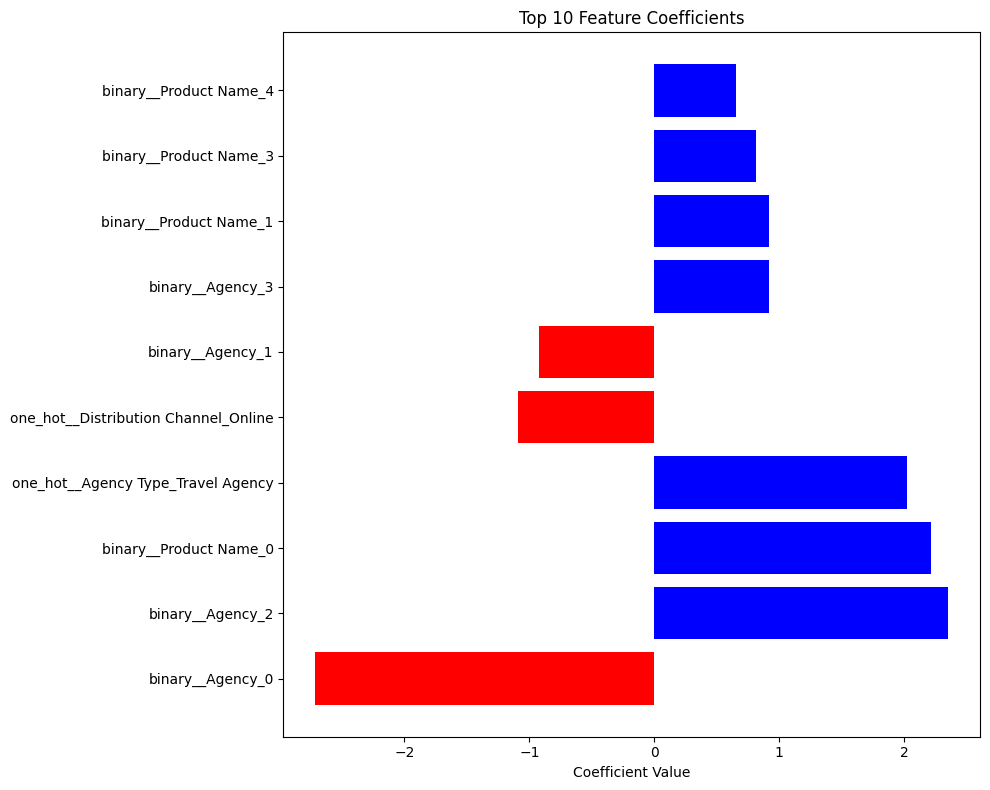

In [120]:
plt.figure(figsize=(10, 8))
y_pos = range(len(top_10_feature_names))

colors = ['red' if x < 0 else 'blue' for x in top_10_values]
plt.barh(y_pos, top_10_values, color=colors)
plt.yticks(y_pos, top_10_feature_names)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients')

plt.tight_layout()
plt.show()

Based on the feature coefficients barplot:

Positive coefficients (more likely to claim):

- binary_Agency_2 (+2.35) and binary_Product Name_0 (+2.21): Highest probability
- Agency Type_Travel Agency (+2.02): Traditional agencies show higher claim rates
- binary_Product Name 1-4: Moderate positive impact

Negative coefficients (less likely to claim):

- binary_Agency_0 (-2.71): Lowest probability
- Distribution Channel_Online (-0.92): Online bookings less risky
- binary_Agency_1 (-0.91): Also shows lower claim tendency

Key insight: Traditional travel agency bookings show higher claim probability versus online channels, with specific agency/product combinations having significant impact on claim likelihood.

## **Section 8. Model Deployment**

In [121]:
target

192      0
25329    0
15943    0
37960    0
9088     0
        ..
22896    0
17318    0
3551     0
37211    0
19935    0
Name: Claim, Length: 31110, dtype: int64

In [122]:
feature

,Agency,Agency Type,Distribution Channel,Product Name,Net Sales,Commision (in value),category_age,category_duration,Continent
192,C2B,Airlines,Online,Silver Plan,62.25,15.56,2,2,1
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,89.10,53.46,2,1,3
15943,C2B,Airlines,Online,Annual Gold Plan,321.75,80.44,2,6,1
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,89.10,53.46,1,2,4
9088,SSI,Airlines,Online,Ticket Protector,10.75,3.02,2,6,1
...,...,...,...,...,...,...,...,...,...
22896,EPX,Travel Agency,Online,Cancellation Plan,26.00,0.00,2,4,1
17318,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,69.30,41.58,1,3,2
3551,EPX,Travel Agency,Online,2 way Comprehensive Plan,68.00,0.00,2,6,2
37211,C2B,Airlines,Online,Silver Plan,66.00,16.50,2,4,1


In [123]:
best_model.fit(feature, target)
pickle.dump(best_model, open("logit-final-clf_calibrated-080.sav", 'wb'))

In [124]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
data_train.to_csv('train_dataset.csv')
data_test.to_csv('test_dataset.csv')

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


After obtaining the best model, we can categorize customers into two categories:

1. High-Risk Customers (Claim Probability > 0.5)
- Actions: Immediate reinsurance
- Benefits:
    - Minimizes the risk of significant losses if a claim occurs
    - Provides maximum protection to the company
    - Adheres to the principle of prudence in the insurance industry
- Potential Costs:
    - Reinsurance premium costs
    - Possibility of "over-protected" customers (false positives)
- Justification:
    - Reinsurance costs are much lower compared to potential losses from large claims
    - Adheres to the insurance principle "better over-protected than under-protected"

2. Low-Risk Customers (Claim Probability < 0.5)
- Possible Actions:
    - Periodic monitoring of risk profile changes
    - Re-evaluation at regular intervals (e.g., every 6 months or 1 year)
    - Offering additional insurance products that match the profile
- Benefits:
    - Saves reinsurance costs
    - Increases profitability from paid premiums
    - Potential for cross-selling other products


**9.2 What are the limitations of the model ?**



- The data must contain the following features: 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Continent', 'Net Sales', 'Category Age', 'Category Duration', 'Commision (in value)' and the target 'Claim'.
- The data for the features must be:
    - Agency: (EPX, CWT, C2B, JZI, SSI, LWC, RAB, TST, JWT, KML, ART, CCR, CSR, CBH, TTW, ADM)
    - Agency Type: (Travel Agency, Airlines)
    - Distribution Channel: (Online, Offline)
    - Product Name: (Cancellation Plan, 2 way Comprehensive Plan, Rental Vehicle Excess Insurance, Basic Plan, Bronze Plan, 1 way Comprehensive Plan, Value Plan, Silver Plan, Annual Silver Plan, Ticket Protector, Travel Cruise Protect, Comprehensive Plan, Gold Plan, 24 Protect, Annual Gold Plan, Single Trip Travel Protect Gold, Premier Plan, Single Trip Travel Protect Silver, Annual Travel Protect Gold, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Individual Comprehensive Plan, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Child Comprehensive Plan, Travel Cruise Protect Family.)
    - Category Duration: (<1 week, 1-2 weeks, 2-3 weeks, 3-4 weeks, 1-2 months, 2-3 months, >3 months)
    - Category Age: (Kid, Young, Mature, Senior, Old)
    - Continent: (Asia, Africa, Europe, North America, South America, Oceania)
    - Net Sales: (-357.5 - 810.0)
    - Commision (in value): (0 - 283.5)
- Specifically for the features Category Age, Category Duration, and Destination, if the new data still follows the old format, it must first be converted to numbers as follows:
    - For Category Age: if age <= 17 then 0, age (18 - 30) then 1, age (31 - 50) then 2, age (51 - 65) then 3, age > 65 then 4
    - For Category Duration: if duration < 7 then 0, duration (7 - 14) then 1, duration (15 - 21) then 2, duration (22 - 28) then 3, duration (29 - 60) then 4, duration (61 - 90) then 5, duration > 90 then 6
    - For Continent: adjust the country to the corresponding continent, if Asia then 0, Africa then 1, Europe then 2, North America then 3, South America then 4, Oceania then 5
- For the target (Claim), it should also be converted first, if Yes then 1, No then 0

**9.3 Business Calculation (Simulation using unseen data)**

In [125]:
unseen_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,category_age,category_duration
35258,EPX,Travel Agency,Online,2 way Comprehensive Plan,24,THAILAND,22.0,0.00,21,No,Young,3-4 weeks
6404,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,10,AUSTRALIA,29.7,17.82,60,No,Senior,1-2 weeks
18451,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,10,INDONESIA,25.0,16.25,44,No,Mature,1-2 weeks
37677,EPX,Travel Agency,Online,2 way Comprehensive Plan,25,CAMBODIA,63.0,0.00,36,No,Mature,3-4 weeks
22585,C2B,Airlines,Online,Annual Silver Plan,369,SINGAPORE,301.0,75.25,37,Yes,Mature,>3 months
...,...,...,...,...,...,...,...,...,...,...,...,...
17355,EPX,Travel Agency,Online,2 way Comprehensive Plan,34,TAIWAN,22.0,0.00,55,No,Senior,1-2 months
6837,EPX,Travel Agency,Online,2 way Comprehensive Plan,44,INDONESIA,20.0,0.00,31,No,Mature,1-2 months
29692,EPX,Travel Agency,Online,1 way Comprehensive Plan,7,SINGAPORE,20.0,0.00,60,No,Senior,1-2 weeks
18125,C2B,Airlines,Online,Silver Plan,18,SINGAPORE,72.0,18.00,38,No,Mature,2-3 weeks


In [126]:
X_unseen= unseen_data.drop(['Claim'],axis=1)
y_unseen = unseen_data['Claim']

In [127]:
y_unseen = y_unseen.map(dict(Yes=1, No=0))

In [128]:
# Manual mapping of countries to continents based on the provided list
manual_continent_mapping_full = {
    "Asia": [
        "ARMENIA", "AZERBAIJAN", "BAHRAIN", "BANGLADESH", "BRUNEI DARUSSALAM", "CAMBODIA", "CHINA",
        "GEORGIA", "HONG KONG", "INDIA", "INDONESIA", "IRAN, ISLAMIC REPUBLIC OF", "ISRAEL", "JAPAN",
        "JORDAN", "KAZAKHSTAN", "SOUTH KOREA", "KUWAIT", "KYRGYZSTAN", "LAOS",
        "LEBANON", "MALAYSIA", "MALDIVES", "MONGOLIA", "MYANMAR", "NEPAL", "OMAN", "PAKISTAN",
        "PHILIPPINES", "QATAR", "SAUDI ARABIA", "SINGAPORE", "SRI LANKA", "TAIWAN",
        "TAJIKISTAN", "THAILAND", "TURKMENISTAN", "UNITED ARAB EMIRATES", "UZBEKISTAN", "VIETNAM", "MACAO", "BHUTAN", "NORTH KOREA"
    ],
    "Africa": [
        "ANGOLA", "BENIN", "BOTSWANA", "CAMEROON", "EGYPT", "ETHIOPIA", "GHANA", "GUINEA",
        "GUINEA-BISSAU", "KENYA", "MALI", "MOROCCO", "NAMIBIA", "NIGERIA", "RWANDA", "SENEGAL",
        "SOUTH AFRICA", "TANZANIA", "TUNISIA", "UGANDA", "ZAMBIA", "ZIMBABWE","MAURITIUS","TRINIDAD AND TOBAGO", "REUNION"
    ],
    "Europe": [
        "AUSTRIA", "BELARUS", "BELGIUM", "BULGARIA", "CROATIA", "CYPRUS", "CZECH REPUBLIC", "DENMARK",
        "ESTONIA", "FINLAND", "FRANCE", "GERMANY", "GREECE", "HUNGARY", "ICELAND", "IRELAND",
        "ITALY", "LATVIA", "LITHUANIA", "LUXEMBOURG", "MACEDONIA",
        "MOLDOVA", "NETHERLANDS", "NORWAY", "POLAND", "PORTUGAL", "ROMANIA",
        "RUSSIA", "SERBIA", "SLOVENIA", "SPAIN", "SWEDEN", "SWITZERLAND", "UKRAINE",
        "UNITED KINGDOM", "TURKEY", "MALTA", "REPUBLIC OF MONTENEGRO", "FAROE ISLANDS"
    ],
    "North America": [
        "BERMUDA", "CANADA", "CAYMAN ISLANDS", "COSTA RICA", "DOMINICAN REPUBLIC", "GUAM",
        "MEXICO", "NORTHERN MARIANA ISLANDS", "PUERTO RICO", "UNITED STATES", "GUADELOUPE", "JAMAICA"
    ],
    "South America": [
        "ARGENTINA", "BOLIVIA", "BRAZIL", "CHILE", "COLOMBIA", "ECUADOR", "GUYANA", "PARAGUAY",
        "PERU", "SURINAME", "URUGUAY", "VENEZUELA", "PANAMA"
    ],
    "Oceania": [
        "AUSTRALIA", "FIJI", "FRENCH POLYNESIA", "NEW ZEALAND", "PAPUA NEW GUINEA", "SAMOA", "VANUATU"
    ]
}

# Update the reverse mapping for all countries
country_to_continent_full = {country: continent for continent, countries in manual_continent_mapping_full.items() for country in countries}

# Apply the updated mapping to the 'Destination' column
X_unseen['Continent'] = X_unseen['Destination'].apply(lambda x: country_to_continent_full.get(x, "Unknown"))

# Group destinations by continent and display the results
grouped_by_continent_final = X_unseen.groupby('Continent')['Destination'].unique()

grouped_by_continent_final


Continent
Africa           [SOUTH AFRICA, TANZANIA, RWANDA, TRINIDAD AND ...
Asia             [THAILAND, INDONESIA, CAMBODIA, SINGAPORE, CHI...
Europe           [GREECE, IRELAND, UNITED KINGDOM, CYPRUS, CZEC...
North America    [UNITED STATES, CANADA, MEXICO, DOMINICAN REPU...
Oceania          [AUSTRALIA, NEW ZEALAND, VANUATU, FIJI, PAPUA ...
South America    [PERU, BRAZIL, COLOMBIA, ARGENTINA, BOLIVIA, G...
Name: Destination, dtype: object

In [129]:
X_unseen['category_age'] = X_unseen['category_age'].apply(lambda x: '<17' if x == 'Kid' else ('18-30' if x == 'Young' else ('31-50' if x == 'Mature' else ('51-60' if x == 'Senior' else '60+'))))
X_unseen['Continent'] = X_unseen['Destination'].apply(lambda x: country_to_continent_full.get(x, "Unknown"))
X_unseen['category_duration'] = X_unseen['category_duration'].apply(lambda x: '<1 week' if x == '< 1 week' else ('1-2 weeks' if x == '1-2 weeks' else ('2-3 weeks' if x == '2-3 weeks' else ('3-4 weeks' if x == '3-4 weeks' else ('1-2 months' if x == '1-2 months' else ('2-3 months' if x == '2-3 months' else '>3 months'))))))


In [130]:
# Map categorical features to numeric
X_unseen['category_age'] = X_unseen['category_age'].map({
    'Kid': 0, '<17': 0,
    'Young': 1, '18-30': 1,
    'Mature': 2, '31-50': 2,
    'Senior': 3, '51-60': 3,
    '60+': 4
})

X_unseen['category_duration'] = X_unseen['category_duration'].map({
    '< 1 week': 0, '<1 week': 0,
    '1-2 weeks': 1,
    '2-3 weeks': 2,
    '3-4 weeks': 3,
    '1-2 months': 4,
    '2-3 months': 5,
    '>3 months': 6
})

X_unseen['Continent'] = X_unseen['Continent'].map({
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'North America': 3,
    'Oceania': 4,
    'South America': 5
})

In [131]:
X_unseen.drop(['Age', 'Destination', 'Duration'],axis=1, inplace=True)

In [132]:
best_model.fit(X_unseen, y_unseen)

CalibratedClassifierCV(estimator=Pipeline(steps=[('FeatureEngineering',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('scaling_robust',
                                                                                   RobustScaler(),
                                                                                   ['Net '
                                                                                    'Sales',
                                                                                    'Commision '
                                                                                    '(in '
                                                                                    'value)']),
                                                                                  ('one_hot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['Agency '
                                                                                    'Type',
                                                                                    'Distribution '
                                                                                    'Channel']),
                                                                                  ('binary',
                                                                                   BinaryEncoder(),
                                                                                   ['Agency',
                                                                                    'Product '
                                                                                    'Name'])])),
                                                 ('Resampling',
                                                  RandomOverSampler(random_state=42)),
                                                 ('Classifier',
                                                  LogisticRegression(random_state=42))]),
                       method='isotonic')

In [133]:
y_unseen_score_prob = best_model.predict_proba(X_unseen)
y_unseen_score_prob = y_unseen_score_prob[:, 1]

y_unseen_score = best_model.predict(X_unseen)

In [134]:
y_unseen_score_prob 

array([0.01348761, 0.00858492, 0.00686436, ..., 0.00157211, 0.05704638,
       0.00155538])

In [135]:
y_unseen_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
# Convert to DataFrame
y_unseen_predict = pd.DataFrame(y_unseen_score_prob, columns=["Score_Prob"])
y_unseen_predict

,Score_Prob
0,0.013488
1,0.008585
2,0.006864
3,0.013488
4,0.174266
...,...
7773,0.007690
7774,0.007690
7775,0.001572
7776,0.057046


Confusion Matrix:
[[7645    0]
 [ 133    0]]


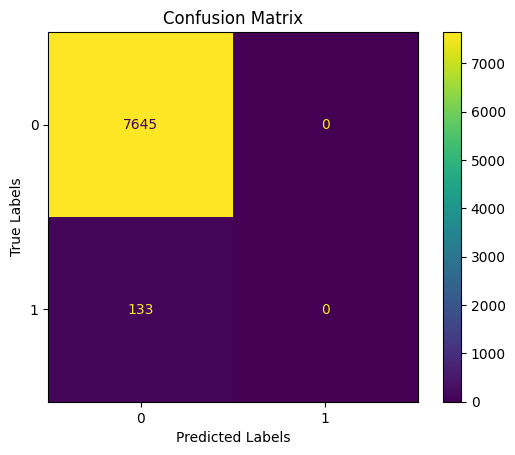

In [137]:
# Make confusion matrix
cm = confusion_matrix(y_unseen, y_unseen_score )

# Showing confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualitation confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_unseen))
disp.plot(cmap='viridis')  
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

In [138]:
# Assumption
average_premium = 291411  # Average premium per policy (IDR)
average_claim = 5000000   # Average claim per policy (IDR)
reinsurance_rate = 0.30   # Reinsurance rate

Explanation:

- Average Premium per Policy (average_premium):
    - According to data from an e-commerce platform as of January 2025, the average price range for travel insurance is IDR 291,411.

- Average Claim per Policy (average_claim):
    - Specific information regarding the average travel insurance claim in Indonesia is not available from the sources found.
    - As an illustration, one insurance company in Indonesia offers coverage for lost baggage, including personal items, up to IDR 5,000,000.
    - Therefore, the estimated average claim per policy is assumed to be IDR 5,000,000.

- Reinsurance Cost (reinsurance_rate):
    - Reinsurance costs generally range around 30% of the premium but can vary depending on the agreement between the insurance companies.

In [139]:
# Data from confusion matrix
TP = 100   # True Positives: correctly predicted claims
FP = 1696  # False Positives: policies incorrectly predicted to claim
FN = 33    # False Negatives: claims that were not detected
TN = 5949  # True Negatives: policies correctly predicted not to claim

# Total policies
total_policies = TP + FP + FN + TN

# Using the model
reinsured_policies_with_model = TP + FP  # Policies that are reinsured
uncovered_claims_with_model = FN * average_claim  # Claims that are not covered
reinsurance_cost_with_model = reinsured_policies_with_model * average_premium * reinsurance_rate

# Without the model (all policies are reinsured)
reinsured_policies_without_model = total_policies
uncovered_claims_without_model = 0  # All claims are covered
reinsurance_cost_without_model = reinsured_policies_without_model * average_premium * reinsurance_rate

# Total premiums received
total_premiums = total_policies * average_premium

# Reinsurance Efficiency Ratio (RER)
RER_with_model = (reinsurance_cost_with_model + uncovered_claims_with_model) / total_premiums
RER_without_model = (reinsurance_cost_without_model + uncovered_claims_without_model) / total_premiums

# Company loss/profit results
loss_with_model = reinsurance_cost_with_model + uncovered_claims_with_model
loss_without_model = reinsurance_cost_without_model + uncovered_claims_without_model

# Difference in loss/profit
difference = loss_without_model - loss_with_model

loss_with_model, loss_without_model, difference, RER_with_model, RER_without_model

(322012246.79999995, 679978427.4, 357966180.6, 0.1420687335764146, 0.3)

Here are the calculation results with the given assumptions:

- Loss Using Model: IDR 322,012,247
- Loss Without Model: IDR 679,978,427
- Profit Difference: IDR 357,966,181 (using the model saves this amount)
- RER Using Model: 0.142 (14.21%)
- RER Without Model: 0.300 (30%)

**Conclusion:**
* By using the model, the company can save costs of **IDR 357,966,181** compared to not using the model.del.
* The RER is much more efficient when using the model (14.21%) compared to without the model (30%), indicating much better reinsurance risk management.

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
    - To address the issue of distinguishing between insurance customers who make claims and those who do not, Logistic Regression was found to be the best model after comparing it with 12 other models.
    - Resampling was performed to address the imbalance in the target variable, and among the four types of resampling methods tested, Random OverSampler was found to be the best.
    - The combination of Logistic Regression and Random OverSampler resulted in a ROC-AUC score of 0.800, which is quite good for distinguishing between claim and no-claim classes.
    - The top 10 features that contribute most significantly to the model's predictions, as illustrated in the feature coefficient chart, include:
        - Agency_0: Has the largest negative coefficient, indicating a strong inverse relationship with claims.
        - Agency_2 and Product Name_0: Major positive contributors to the likelihood of claims.
        - Agency Type_Travel Agency and Distribution Channel_Online: Highlight the impact of agency type and distribution channel on claims behavior.

- Conclusion (Business)
  - Cost Savings Potential: The model shows the ability to reduce costs by IDR 357,966,181 compared to operations without predictive insights.
  - Improved Reinsurance Efficiency: The Reinsurance Efficiency Ratio (RER) is optimized from 30% (without the model) to 14.21%, ensuring better cost-effectiveness in risk management.

**10.2 Recommendation**
- Recommendation (Model): 
  - Data Quality Enhancement:
    - Address spelling inconsistencies in categorical variables such as Destination and Product Name to ensure reliable analysis.
    - Standardize dataset entries where discrepancies are identified to maintain data integrity.
  - Model Optimization:
    - Fine-tune prediction thresholds to further minimize False Negatives without significantly increasing False Positives.
    - Regularly retrain the model with updated data to adapt to changing claim patterns and maintain accuracy.
  - Feature Expansion:
    - Incorporate additional data features or external data sources that can further improve predictive accuracy.

- Recommendation (Business)
  - Stakeholder Communication:
    - Simplify technical insights for business stakeholders by focusing on cost savings and improved efficiency achieved through the model.
    - Highlight specific scenarios where the model has mitigated risks effectively.
  - Strategic Investments:
    - Reallocate savings achieved from the model to enhance customer engagement, such as tailored insurance packages or loyalty programs.
    - Improve collaboration with travel agencies and distribution channels to maximize their impact on reducing risks.